# Bitcoin Cryptocurrency Market Analysis

This notebook analyzes Bitcoin and cryptocurrency market data, including:
- Historical trends in prices and market capitalization
- Bitcoin's market dominance
- Volatility analysis
- Price correlations
- Seasonal trends
- Future price predictions

**Dataset Information:**
- Date: date of observation
- Open: Opening price on the given day
- High: Highest price on the given day
- Low: Lowest price on the given day
- Close: Closing price on the given day
- Volume: Volume of transactions on the given day
- Market Cap: Market capitalization in USD

In [68]:
%pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. Import Required Libraries

Import necessary libraries including pandas, numpy, matplotlib, seaborn, and scikit-learn for data analysis and visualization.

In [69]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from glob import glob
import os

# For time series analysis
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Dataset

Load cryptocurrency data from the 'data' folder, display basic statistics, check for missing values, and understand the structure of the dataset.

In [70]:
# Load all CSV files from the data folder
data_path = 'data/raw'
csv_files = glob(os.path.join(data_path, '*.csv'))

print(f"Found {len(csv_files)} cryptocurrency datasets:")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

Found 23 cryptocurrency datasets:
  - coin_Stellar.csv
  - coin_Polkadot.csv
  - coin_Monero.csv
  - coin_Litecoin.csv
  - coin_Uniswap.csv
  - coin_ChainLink.csv
  - coin_Cosmos.csv
  - coin_Tron.csv
  - coin_Cardano.csv
  - coin_CryptocomCoin.csv
  - coin_NEM.csv
  - coin_Ethereum.csv
  - coin_USDCoin.csv
  - coin_Bitcoin.csv
  - coin_Solana.csv
  - coin_Tether.csv
  - coin_WrappedBitcoin.csv
  - coin_Aave.csv
  - coin_Dogecoin.csv
  - coin_Iota.csv
  - coin_BinanceCoin.csv
  - coin_EOS.csv
  - coin_XRP.csv


In [71]:
# Load all cryptocurrency data into a dictionary
crypto_data = {}

for file in csv_files:
    # Extract cryptocurrency name from filename
    crypto_name = os.path.basename(file).replace('.csv', '').replace('_', ' ').title()
    
    # Load the data
    df = pd.read_csv(file)
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort by date
    df = df.sort_values('Date').reset_index(drop=True)
    
    # Store in dictionary
    crypto_data[crypto_name] = df
    
print(f"\nLoaded {len(crypto_data)} cryptocurrencies successfully!")
print(f"\nCryptocurrencies: {list(crypto_data.keys())}")


Loaded 23 cryptocurrencies successfully!

Cryptocurrencies: ['Coin Stellar', 'Coin Polkadot', 'Coin Monero', 'Coin Litecoin', 'Coin Uniswap', 'Coin Chainlink', 'Coin Cosmos', 'Coin Tron', 'Coin Cardano', 'Coin Cryptocomcoin', 'Coin Nem', 'Coin Ethereum', 'Coin Usdcoin', 'Coin Bitcoin', 'Coin Solana', 'Coin Tether', 'Coin Wrappedbitcoin', 'Coin Aave', 'Coin Dogecoin', 'Coin Iota', 'Coin Binancecoin', 'Coin Eos', 'Coin Xrp']


In [72]:
# Display basic information about the first cryptocurrency
first_crypto = list(crypto_data.keys())[0]
print(f"=== Sample Data: {first_crypto} ===\n")
print(crypto_data[first_crypto].head(10))

=== Sample Data: Coin Stellar ===

   SNo     Name Symbol                Date      High       Low      Open  \
0    1  Stellar    XLM 2014-08-06 23:59:59  0.003402  0.002266  0.002373   
1    2  Stellar    XLM 2014-08-07 23:59:59  0.003042  0.002455  0.002686   
2    3  Stellar    XLM 2014-08-08 23:59:59  0.003243  0.002493  0.002493   
3    4  Stellar    XLM 2014-08-09 23:59:59  0.003710  0.002873  0.002884   
4    5  Stellar    XLM 2014-08-10 23:59:59  0.007620  0.003363  0.003497   
5    6  Stellar    XLM 2014-08-11 23:59:59  0.005065  0.003591  0.004566   
6    7  Stellar    XLM 2014-08-12 23:59:59  0.003679  0.002503  0.003592   
7    8  Stellar    XLM 2014-08-13 23:59:59  0.003215  0.002570  0.002619   
8    9  Stellar    XLM 2014-08-14 23:59:59  0.002850  0.002482  0.002763   
9   10  Stellar    XLM 2014-08-15 23:59:59  0.002610  0.002357  0.002566   

      Close         Volume     Marketcap  
0  0.002657   35819.800781  9.663695e+05  
1  0.002501  142864.000000  1.079148e+06  

In [73]:
# Display dataset information
print(f"\n=== Dataset Info: {first_crypto} ===")
print(crypto_data[first_crypto].info())


=== Dataset Info: Coin Stellar ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2527 non-null   int64         
 1   Name       2527 non-null   object        
 2   Symbol     2527 non-null   object        
 3   Date       2527 non-null   datetime64[ns]
 4   High       2527 non-null   float64       
 5   Low        2527 non-null   float64       
 6   Open       2527 non-null   float64       
 7   Close      2527 non-null   float64       
 8   Volume     2527 non-null   float64       
 9   Marketcap  2527 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 197.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0 

In [74]:
# Display statistical summary
print(f"\n=== Statistical Summary: {first_crypto} ===")
print(crypto_data[first_crypto].describe())


=== Statistical Summary: Coin Stellar ===
               SNo                           Date         High          Low  \
count  2527.000000                           2527  2527.000000  2527.000000   
mean   1264.000000  2018-01-20 23:59:59.000000512     0.106980     0.095780   
min       1.000000            2014-08-06 23:59:59     0.001509     0.001227   
25%     632.500000            2016-04-29 11:59:59     0.002555     0.002325   
50%    1264.000000            2018-01-20 23:59:59     0.052033     0.047695   
75%    1895.500000            2019-10-14 11:59:59     0.128354     0.119867   
max    2527.000000            2021-07-06 23:59:59     0.938144     0.677496   
std     729.626388                            NaN     0.150700     0.131285   

              Open        Close        Volume     Marketcap  
count  2527.000000  2527.000000  2.527000e+03  2.527000e+03  
mean      0.101413     0.101509  2.515161e+08  2.019410e+09  
min       0.001352     0.001357  4.910920e+02  9.663695e+05

In [75]:
# Check for missing values in all cryptocurrencies
print("=== Missing Values Analysis ===\n")
for crypto_name, df in crypto_data.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{crypto_name}:")
        print(missing[missing > 0])
    else:
        print(f"{crypto_name}: No missing values")

=== Missing Values Analysis ===

Coin Stellar: No missing values
Coin Polkadot: No missing values
Coin Monero: No missing values
Coin Litecoin: No missing values
Coin Uniswap: No missing values
Coin Chainlink: No missing values
Coin Cosmos: No missing values
Coin Tron: No missing values
Coin Cardano: No missing values
Coin Cryptocomcoin: No missing values
Coin Nem: No missing values
Coin Ethereum: No missing values
Coin Usdcoin: No missing values
Coin Bitcoin: No missing values
Coin Solana: No missing values
Coin Tether: No missing values
Coin Wrappedbitcoin: No missing values
Coin Aave: No missing values
Coin Dogecoin: No missing values
Coin Iota: No missing values
Coin Binancecoin: No missing values
Coin Eos: No missing values
Coin Xrp: No missing values


In [76]:
# Display date ranges for each cryptocurrency
print("\n=== Date Ranges ===\n")
date_info = []
for crypto_name, df in crypto_data.items():
    date_info.append({
        'Cryptocurrency': crypto_name,
        'Start Date': df['Date'].min(),
        'End Date': df['Date'].max(),
        'Days of Data': len(df)
    })

date_df = pd.DataFrame(date_info)
print(date_df.to_string(index=False))


=== Date Ranges ===

     Cryptocurrency          Start Date            End Date  Days of Data
       Coin Stellar 2014-08-06 23:59:59 2021-07-06 23:59:59          2527
      Coin Polkadot 2020-08-21 23:59:59 2021-07-06 23:59:59           320
        Coin Monero 2014-05-22 23:59:59 2021-07-06 23:59:59          2602
      Coin Litecoin 2013-04-29 23:59:59 2021-07-06 23:59:59          2991
       Coin Uniswap 2020-09-18 23:59:59 2021-07-06 23:59:59           292
     Coin Chainlink 2017-09-21 23:59:59 2021-07-06 23:59:59          1385
        Coin Cosmos 2019-03-15 23:59:59 2021-07-06 23:59:59           845
          Coin Tron 2017-09-14 23:59:59 2021-07-06 23:59:59          1392
       Coin Cardano 2017-10-02 23:59:59 2021-07-06 23:59:59          1374
 Coin Cryptocomcoin 2018-12-15 23:59:59 2021-07-06 23:59:59           935
           Coin Nem 2015-04-02 23:59:59 2021-07-06 23:59:59          2288
      Coin Ethereum 2015-08-08 23:59:59 2021-07-06 23:59:59          2160
       Coin Usdc

## 3. Historical Price and Market Capitalization Analysis

Visualize how the historical prices (Open, High, Low, Close) and market capitalizations of various cryptocurrencies changed over time using line plots and area charts.

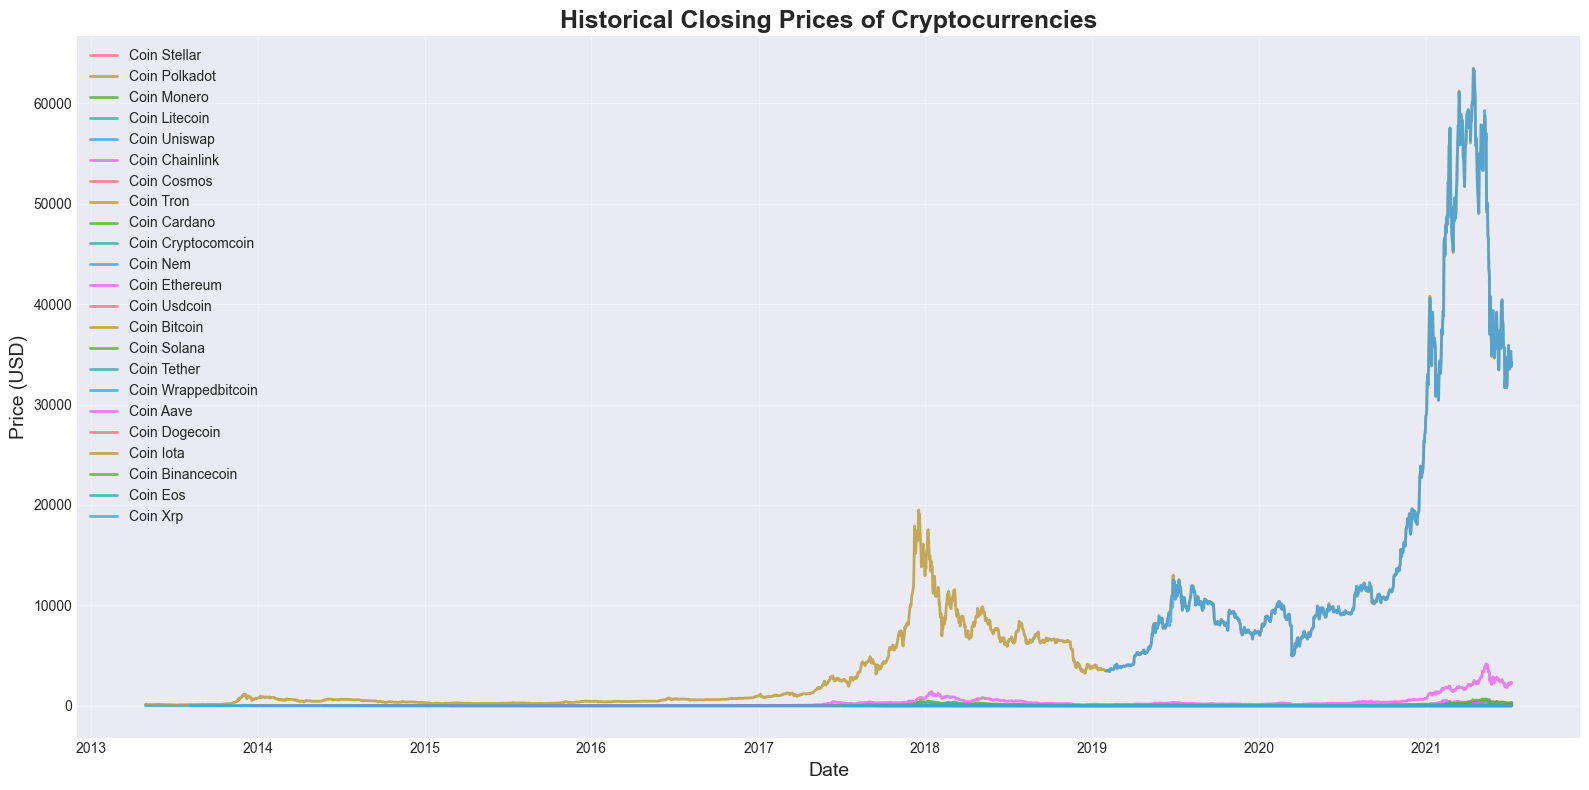

In [77]:
# Plot historical closing prices for all cryptocurrencies
plt.figure(figsize=(16, 8))

for crypto_name, df in crypto_data.items():
    plt.plot(df['Date'], df['Close'], label=crypto_name, linewidth=2, alpha=0.8)

plt.title('Historical Closing Prices of Cryptocurrencies', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

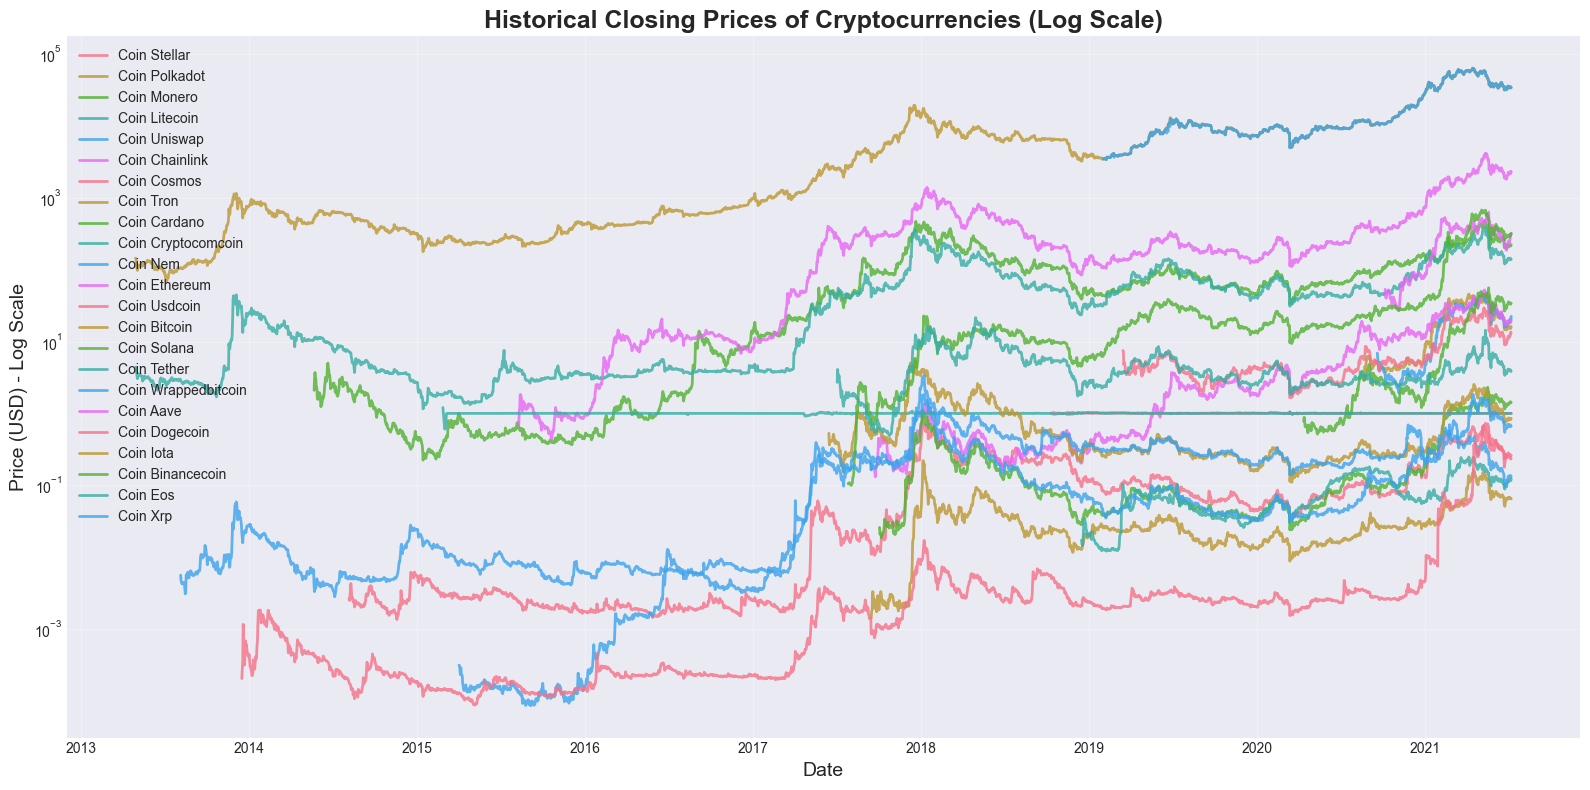

In [78]:
# Plot historical closing prices (log scale for better visualization)
plt.figure(figsize=(16, 8))

for crypto_name, df in crypto_data.items():
    plt.plot(df['Date'], df['Close'], label=crypto_name, linewidth=2, alpha=0.8)

plt.title('Historical Closing Prices of Cryptocurrencies (Log Scale)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD) - Log Scale', fontsize=14)
plt.yscale('log')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [79]:
# Plot historical market capitalization for all cryptocurrencies
plt.figure(figsize=(16, 8))

# Check if there's data to plot
has_data = False

for crypto_name, df in crypto_data.items():
    if 'Market Cap' in df.columns:
        # Remove NaN values
        data = df[['Date', 'Market Cap']].dropna()
        if len(data) > 0:
            has_data = True
            plt.plot(data['Date'], data['Market Cap'], label=crypto_name, linewidth=2, alpha=0.8)

if has_data:
    plt.title('Historical Market Capitalization of Cryptocurrencies', fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Market Cap (USD)', fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No market capitalization data available to plot.")
    print("\nChecking available columns in datasets:")
    for crypto_name, df in crypto_data.items():
        print(f"\n{crypto_name}: {df.columns.tolist()}")

No market capitalization data available to plot.

Checking available columns in datasets:

Coin Stellar: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Polkadot: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Monero: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Litecoin: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Uniswap: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Chainlink: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Cosmos: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Tron: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Coin Cardano: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close'

<Figure size 1600x800 with 0 Axes>

In [80]:
# Plot historical market capitalization with log scale (better for wide value ranges)
plt.figure(figsize=(16, 8))

has_data = False

for crypto_name, df in crypto_data.items():
    if 'Market Cap' in df.columns:
        # Remove NaN values
        data = df[['Date', 'Market Cap']].dropna()
        if len(data) > 0 and data['Market Cap'].max() > 0:
            has_data = True
            plt.plot(data['Date'], data['Market Cap'], label=crypto_name, linewidth=2, alpha=0.8)

if has_data:
    plt.title('Historical Market Capitalization (Log Scale)', fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Market Cap (USD) - Log Scale', fontsize=14)
    plt.yscale('log')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No market capitalization data available for log scale plot.")

No market capitalization data available for log scale plot.


<Figure size 1600x800 with 0 Axes>

In [81]:
# Plot OHLC (Open, High, Low, Close) for a specific cryptocurrency
if 'Bitcoin' in crypto_data or 'Btc' in crypto_data:
    bitcoin_key = 'Bitcoin' if 'Bitcoin' in crypto_data else 'Btc'
    btc_df = crypto_data[bitcoin_key]
    
    # Select recent data (last 365 days)
    recent_btc = btc_df.tail(365)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    ax.plot(recent_btc['Date'], recent_btc['Open'], label='Open', linewidth=1.5, alpha=0.7)
    ax.plot(recent_btc['Date'], recent_btc['High'], label='High', linewidth=1.5, alpha=0.7)
    ax.plot(recent_btc['Date'], recent_btc['Low'], label='Low', linewidth=1.5, alpha=0.7)
    ax.plot(recent_btc['Date'], recent_btc['Close'], label='Close', linewidth=2, alpha=0.9)
    
    ax.fill_between(recent_btc['Date'], recent_btc['Low'], recent_btc['High'], alpha=0.2)
    
    plt.title('Bitcoin OHLC Prices (Last 365 Days)', fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

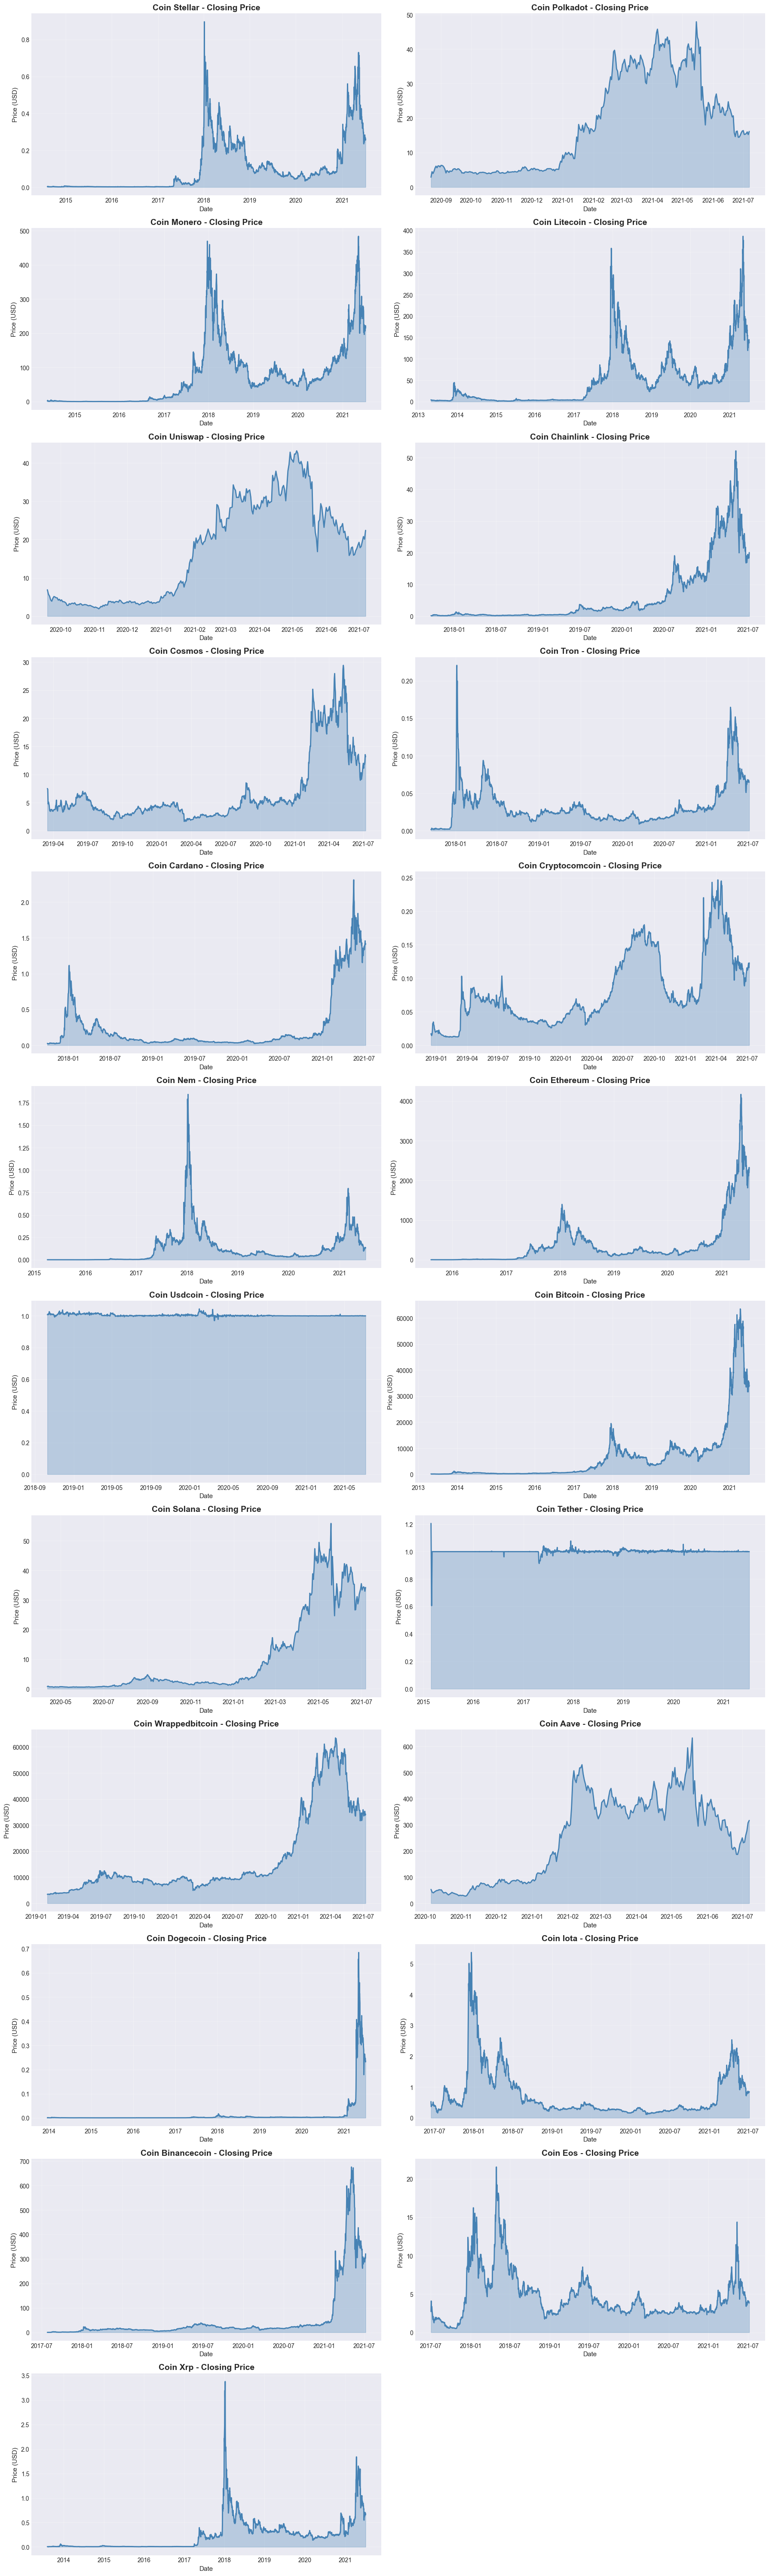

In [82]:
# Create individual subplots for each cryptocurrency's closing price
n_cryptos = len(crypto_data)
n_cols = 2
n_rows = (n_cryptos + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_cryptos > 1 else [axes]

for idx, (crypto_name, df) in enumerate(crypto_data.items()):
    ax = axes[idx]
    ax.plot(df['Date'], df['Close'], linewidth=2, color='steelblue')
    ax.fill_between(df['Date'], df['Close'], alpha=0.3, color='steelblue')
    ax.set_title(f'{crypto_name} - Closing Price', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('Price (USD)', fontsize=11)
    ax.grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_cryptos, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 4. Bitcoin Market Dominance Comparison

Compare Bitcoin's market capitalization and trading volume with other cryptocurrencies to determine its relative size and dominance in the market.

In [83]:
# Find Bitcoin in the dataset
bitcoin_key = None
for key in crypto_data.keys():
    if 'bitcoin' in key.lower() or 'btc' in key.lower():
        bitcoin_key = key
        break

if bitcoin_key:
    print(f"Bitcoin found as: {bitcoin_key}")
else:
    print("Bitcoin not found in dataset. Using first cryptocurrency as reference.")
    bitcoin_key = list(crypto_data.keys())[0]

Bitcoin found as: Coin Bitcoin


In [84]:
# Compare latest market capitalization
latest_market_caps = {}

for crypto_name, df in crypto_data.items():
    if 'Market Cap' in df.columns:
        # Get the most recent non-null market cap
        market_cap = df['Market Cap'].dropna().iloc[-1] if len(df['Market Cap'].dropna()) > 0 else 0
        latest_market_caps[crypto_name] = market_cap

# Create a DataFrame and sort
market_cap_df = pd.DataFrame(list(latest_market_caps.items()), 
                              columns=['Cryptocurrency', 'Market Cap'])
market_cap_df = market_cap_df.sort_values('Market Cap', ascending=False)

print("=== Latest Market Capitalization Comparison ===\n")
print(market_cap_df.to_string(index=False))

=== Latest Market Capitalization Comparison ===

Empty DataFrame
Columns: [Cryptocurrency, Market Cap]
Index: []


In [85]:
# Visualize market cap comparison
print("=== Market Cap DataFrame Info ===")
print(f"Number of rows: {len(market_cap_df)}")
print(f"Market Cap values:\n{market_cap_df}")

# Check if we have valid data
if len(market_cap_df) == 0:
    print("\nError: No market cap data to visualize!")
elif market_cap_df['Market Cap'].sum() == 0:
    print("\nError: All market cap values are zero!")
else:
    plt.figure(figsize=(14, 8))
    
    # Create color array
    colors = ['orange' if crypto == bitcoin_key else 'steelblue' 
              for crypto in market_cap_df['Cryptocurrency']]
    
    bars = plt.barh(market_cap_df['Cryptocurrency'], market_cap_df['Market Cap'], 
                    color=colors, alpha=0.8)
    
    plt.xlabel('Market Cap (USD)', fontsize=14)
    plt.title('Market Capitalization Comparison', fontsize=18, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nChart displayed successfully with {len(market_cap_df)} cryptocurrencies")

=== Market Cap DataFrame Info ===
Number of rows: 0
Market Cap values:
Empty DataFrame
Columns: [Cryptocurrency, Market Cap]
Index: []

Error: No market cap data to visualize!


In [86]:
# Calculate Bitcoin's market dominance percentage
if len(latest_market_caps) > 1:
    total_market_cap = sum(latest_market_caps.values())
    bitcoin_market_cap = latest_market_caps.get(bitcoin_key, 0)
    bitcoin_dominance = (bitcoin_market_cap / total_market_cap) * 100 if total_market_cap > 0 else 0
    
    print(f"\n=== Bitcoin Market Dominance ===")
    print(f"Bitcoin Market Cap: ${bitcoin_market_cap:,.2f}")
    print(f"Total Market Cap: ${total_market_cap:,.2f}")
    print(f"Bitcoin Dominance: {bitcoin_dominance:.2f}%")
    
    # Create pie chart
    plt.figure(figsize=(12, 8))
    
    # Prepare data for pie chart
    pie_data = market_cap_df.copy()
    colors = ['orange' if x == bitcoin_key else None for x in pie_data['Cryptocurrency']]
    
    plt.pie(pie_data['Market Cap'], labels=pie_data['Cryptocurrency'], autopct='%1.1f%%',
            startangle=90, colors=colors if None not in colors[:1] else None)
    plt.title('Market Cap Distribution', fontsize=18, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [87]:
# Compare average daily trading volumes
latest_volumes = {}

for crypto_name, df in crypto_data.items():
    if 'Volume' in df.columns:
        # Get average volume from last 30 days
        avg_volume = df['Volume'].tail(30).mean()
        latest_volumes[crypto_name] = avg_volume

# Create a DataFrame and sort
volume_df = pd.DataFrame(list(latest_volumes.items()), 
                         columns=['Cryptocurrency', 'Avg Volume (30d)'])
volume_df = volume_df.sort_values('Avg Volume (30d)', ascending=False)

print("\n=== Average Trading Volume (Last 30 Days) ===\n")
print(volume_df.to_string(index=False))


=== Average Trading Volume (Last 30 Days) ===

     Cryptocurrency  Avg Volume (30d)
        Coin Tether      6.351161e+10
       Coin Bitcoin      3.862905e+10
      Coin Ethereum      2.588301e+10
           Coin Xrp      2.942550e+09
       Coin Cardano      2.770034e+09
      Coin Dogecoin      2.436722e+09
       Coin Usdcoin      2.198142e+09
      Coin Litecoin      2.157743e+09
   Coin Binancecoin      2.153986e+09
      Coin Polkadot      1.491979e+09
           Coin Eos      1.226472e+09
     Coin Chainlink      1.148889e+09
          Coin Tron      1.086846e+09
        Coin Solana      6.155152e+08
       Coin Stellar      5.910042e+08
       Coin Uniswap      4.262309e+08
          Coin Aave      3.500153e+08
        Coin Monero      2.376642e+08
        Coin Cosmos      2.361133e+08
Coin Wrappedbitcoin      1.974256e+08
           Coin Nem      6.590941e+07
 Coin Cryptocomcoin      5.583338e+07
          Coin Iota      5.535029e+07


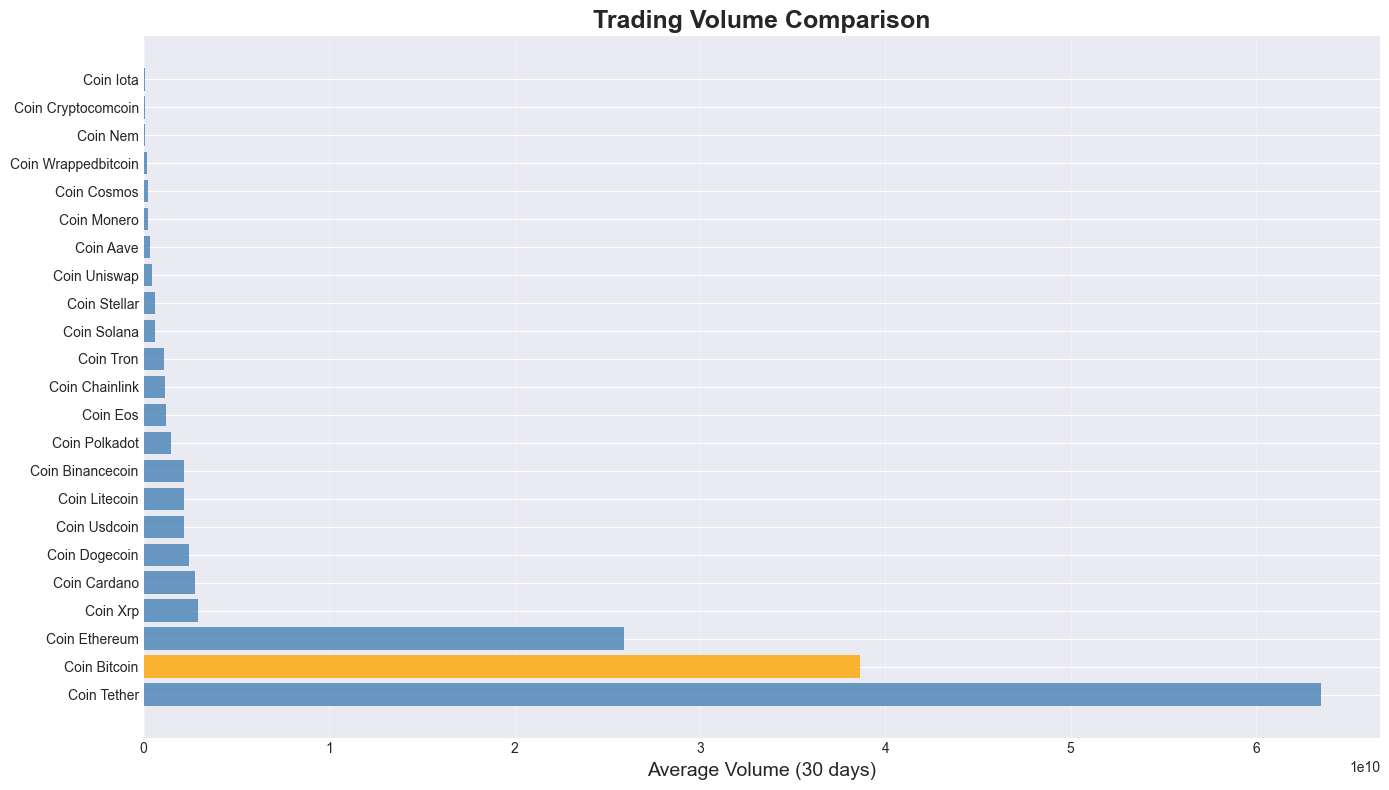

In [88]:
# Visualize volume comparison
plt.figure(figsize=(14, 8))

# Create color array
colors = ['orange' if crypto == bitcoin_key else 'steelblue' 
          for crypto in volume_df['Cryptocurrency']]

bars = plt.barh(volume_df['Cryptocurrency'], volume_df['Avg Volume (30d)'], color=colors, alpha=0.8)

plt.xlabel('Average Volume (30 days)', fontsize=14)
plt.title('Trading Volume Comparison', fontsize=18, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

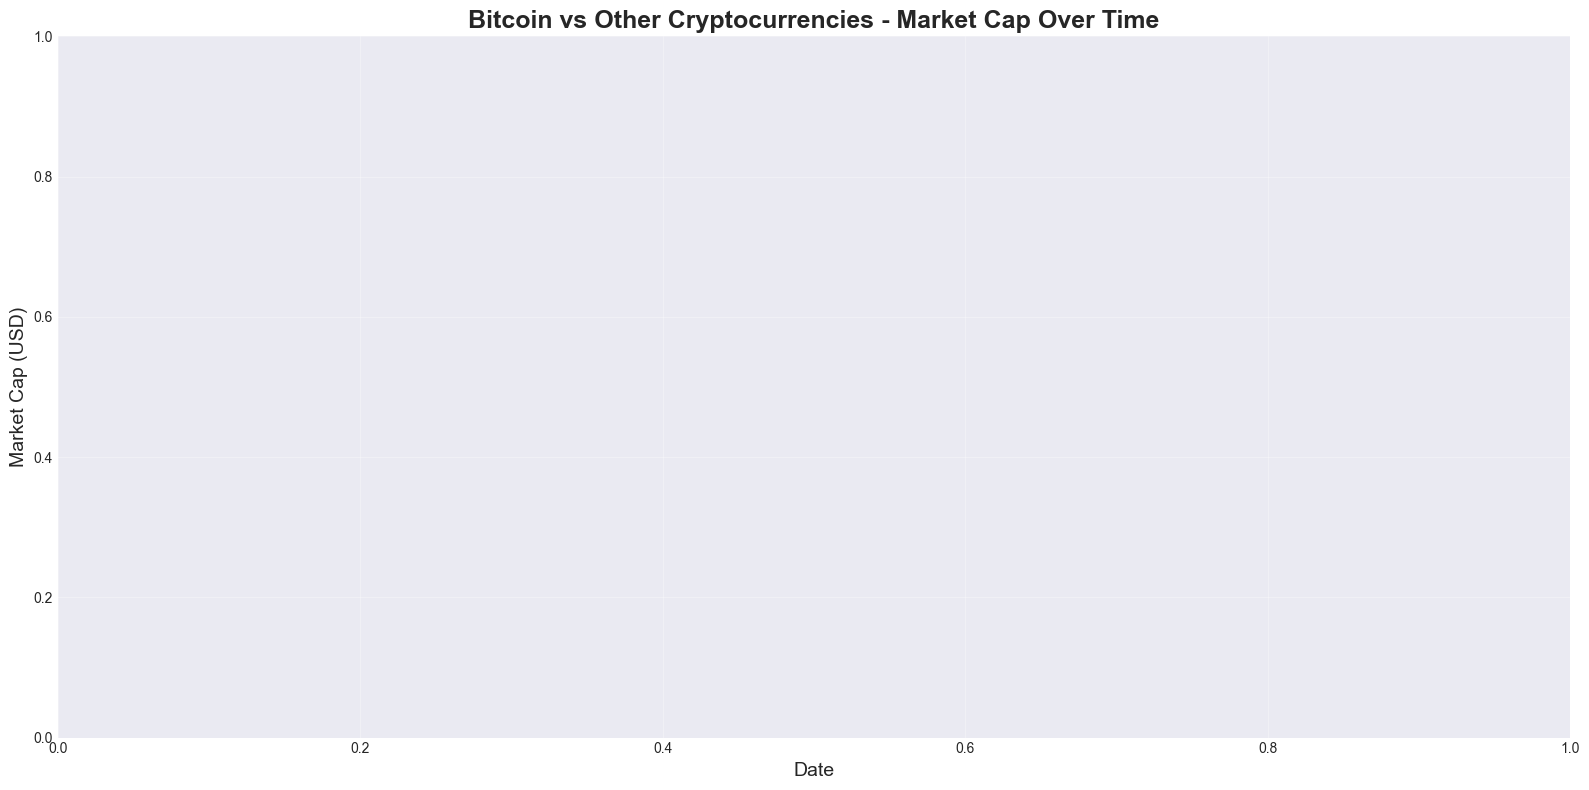

In [89]:
# Compare Bitcoin size over time with other cryptocurrencies
plt.figure(figsize=(16, 8))

# Calculate market cap percentage over time
all_dates = set()
for df in crypto_data.values():
    if 'Market Cap' in df.columns:
        all_dates.update(df['Date'].tolist())

all_dates = sorted(list(all_dates))

# For simplicity, we'll plot market cap trends
for crypto_name, df in crypto_data.items():
    if 'Market Cap' in df.columns:
        data = df[['Date', 'Market Cap']].dropna()
        if crypto_name == bitcoin_key:
            plt.plot(data['Date'], data['Market Cap'], label=crypto_name, 
                    linewidth=3, alpha=0.9, color='orange')
        else:
            plt.plot(data['Date'], data['Market Cap'], label=crypto_name, 
                    linewidth=2, alpha=0.7)

plt.title('Bitcoin vs Other Cryptocurrencies - Market Cap Over Time', 
         fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Market Cap (USD)', fontsize=14)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Price Prediction Model

Build a machine learning model (such as Linear Regression, LSTM, or Prophet) to predict future cryptocurrency prices based on historical data.

In [90]:
# Prepare data for prediction (using Bitcoin as example)
btc_df = crypto_data[bitcoin_key].copy()

# Remove any rows with missing values
btc_df = btc_df.dropna()

# Create additional features
btc_df['Day'] = (btc_df['Date'] - btc_df['Date'].min()).dt.days
btc_df['Price_Change'] = btc_df['Close'].pct_change()
btc_df['Volume_Change'] = btc_df['Volume'].pct_change()
btc_df['High_Low_Diff'] = btc_df['High'] - btc_df['Low']
btc_df['Open_Close_Diff'] = btc_df['Close'] - btc_df['Open']

# Moving averages
btc_df['MA_7'] = btc_df['Close'].rolling(window=7).mean()
btc_df['MA_30'] = btc_df['Close'].rolling(window=30).mean()
btc_df['MA_90'] = btc_df['Close'].rolling(window=90).mean()

# Volatility (standard deviation)
btc_df['Volatility_7'] = btc_df['Close'].rolling(window=7).std()
btc_df['Volatility_30'] = btc_df['Close'].rolling(window=30).std()

# Drop NaN values created by rolling operations
btc_df = btc_df.dropna()

print(f"Dataset shape after feature engineering: {btc_df.shape}")
print(f"\nFeatures created:")
print(btc_df.columns.tolist())

Dataset shape after feature engineering: (2749, 20)

Features created:
['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap', 'Day', 'Price_Change', 'Volume_Change', 'High_Low_Diff', 'Open_Close_Diff', 'MA_7', 'MA_30', 'MA_90', 'Volatility_7', 'Volatility_30']


In [91]:
# Display sample of engineered features
print("=== Sample of Engineered Features ===\n")
print(btc_df[['Date', 'Close', 'MA_7', 'MA_30', 'Volatility_7', 'High_Low_Diff']].tail(10))

=== Sample of Engineered Features ===

                    Date         Close          MA_7         MA_30  \
2981 2021-06-27 23:59:59  34649.644588  33005.931535  35921.291542   
2982 2021-06-28 23:59:59  34434.335314  33399.880332  35915.233786   
2983 2021-06-29 23:59:59  35867.777735  33880.182891  35921.555404   
2984 2021-06-30 23:59:59  35040.837249  34068.441215  35845.154856   
2985 2021-07-01 23:59:59  33572.117653  33912.681466  35741.394627   
2986 2021-07-02 23:59:59  33897.048590  34235.434114  35618.790261   
2987 2021-07-03 23:59:59  34668.548402  34590.044219  35467.449674   
2988 2021-07-04 23:59:59  35287.779766  34681.206387  35413.895489   
2989 2021-07-05 23:59:59  33746.002456  34582.873122  35353.696946   
2990 2021-07-06 23:59:59  34235.193451  34349.646795  35299.457471   

      Volatility_7  High_Low_Diff  
2981   1324.188046    2584.370207  
2982   1272.002261    1317.815899  
2983   1493.541204    2289.626126  
2984   1552.327541    1988.607879  
2985   153

In [92]:
# Prepare features and target for modeling
feature_columns = ['Day', 'Open', 'High', 'Low', 'Volume', 
                   'High_Low_Diff', 'Open_Close_Diff',
                   'MA_7', 'MA_30', 'MA_90', 'Volatility_7', 'Volatility_30']

X = btc_df[feature_columns]
y = btc_df['Close']

# Split data into train and test sets (80-20 split)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining date range: {btc_df['Date'].iloc[0]} to {btc_df['Date'].iloc[split_idx-1]}")
print(f"Test date range: {btc_df['Date'].iloc[split_idx]} to {btc_df['Date'].iloc[-1]}")

Training set size: 2199
Test set size: 550

Training date range: 2013-12-27 23:59:59 to 2020-01-03 23:59:59
Test date range: 2020-01-04 23:59:59 to 2021-07-06 23:59:59


In [93]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


In [94]:
# Build and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Linear Regression Model Performance ===\n")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"\nTraining MAE: ${train_mae:,.2f}")
print(f"Test MAE: ${test_mae:,.2f}")
print(f"\nTraining R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

=== Linear Regression Model Performance ===

Training RMSE: $0.00
Test RMSE: $0.00

Training MAE: $0.00
Test MAE: $0.00

Training R² Score: 1.0000
Test R² Score: 1.0000


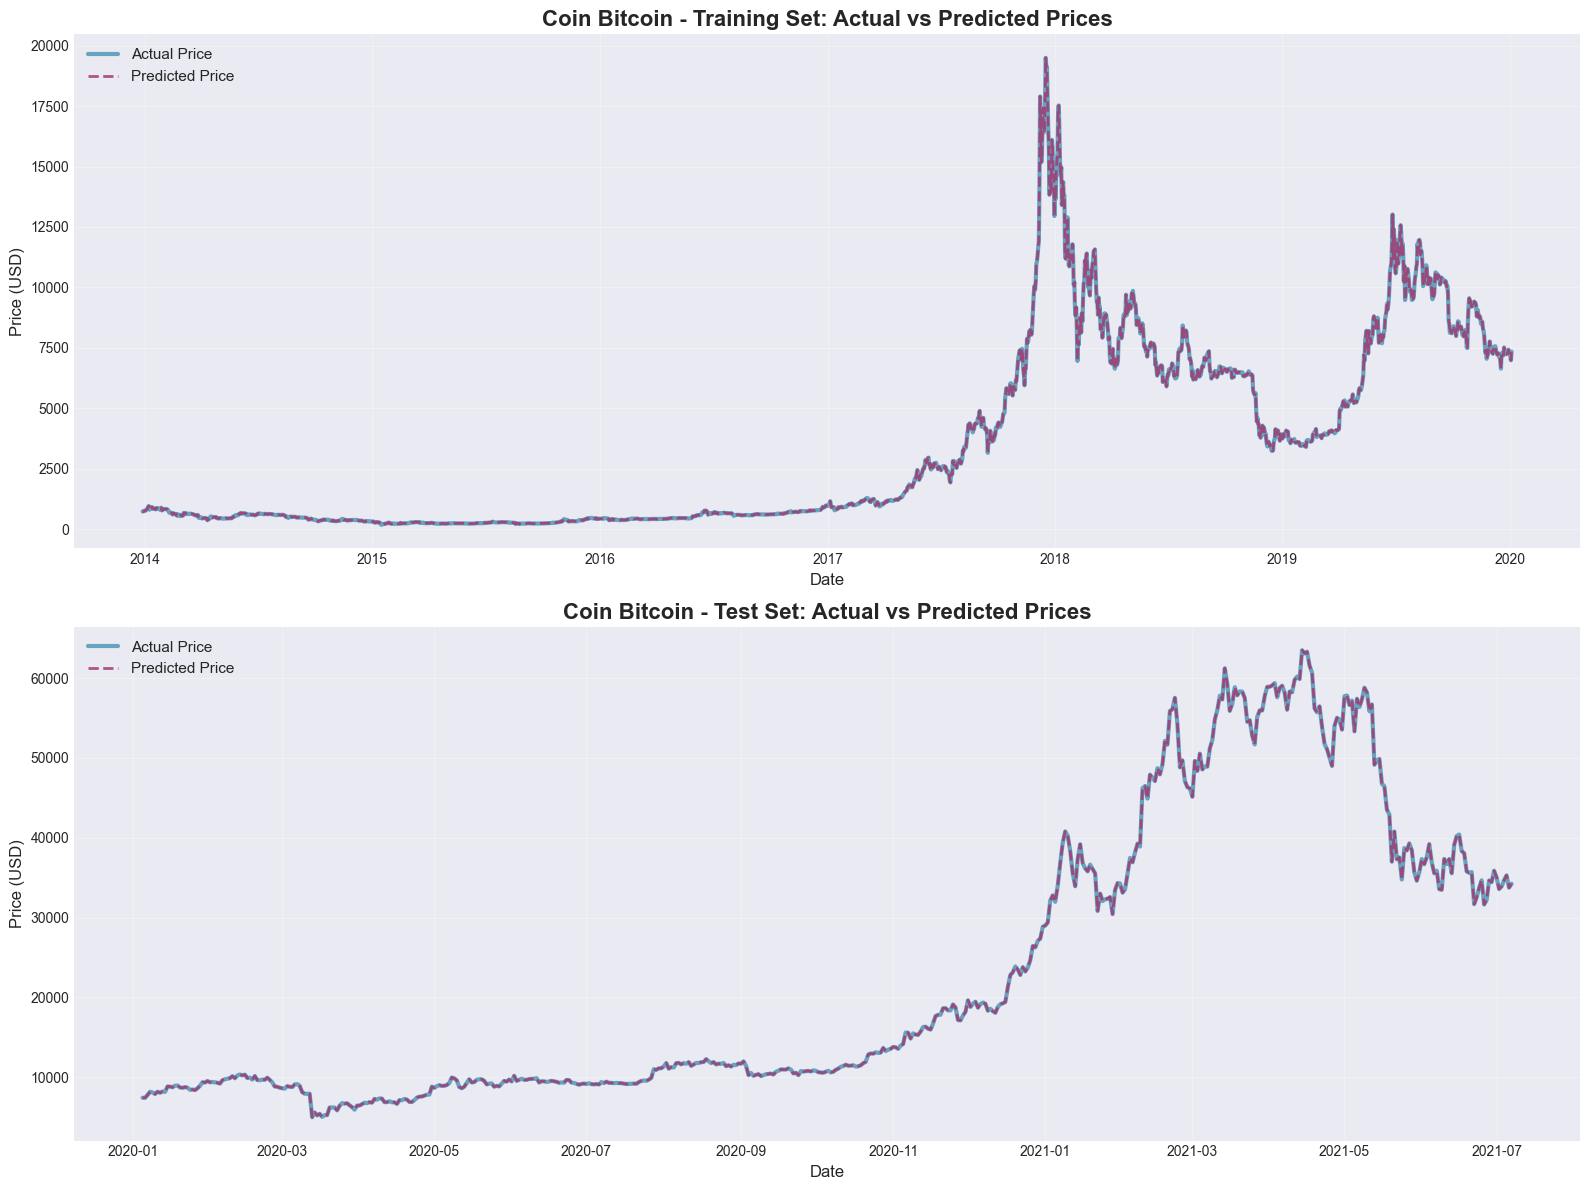

In [133]:
# Visualize predictions vs actual values
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Training set
train_dates = btc_df['Date'].iloc[:split_idx]
# Plot actual with thinner line
ax1.plot(train_dates, y_train, label='Actual Price', 
         linewidth=3, alpha=0.7, color='#2E86AB')
# Plot predicted with distinct color and style on top
ax1.plot(train_dates, y_train_pred, label='Predicted Price', 
         linewidth=2, alpha=0.85, color='#A23B72', linestyle='--')
ax1.set_title(f'{bitcoin_key} - Training Set: Actual vs Predicted Prices', 
             fontsize=16, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Price (USD)', fontsize=12)
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)

# Test set
test_dates = btc_df['Date'].iloc[split_idx:]
# Plot actual with thinner line
ax2.plot(test_dates, y_test.values, label='Actual Price', 
         linewidth=3, alpha=0.7, color='#2E86AB')
# Plot predicted with distinct color and style on top
ax2.plot(test_dates, y_test_pred, label='Predicted Price', 
         linewidth=2, alpha=0.85, color='#A23B72', linestyle='--')
ax2.set_title(f'{bitcoin_key} - Test Set: Actual vs Predicted Prices', 
             fontsize=16, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Price (USD)', fontsize=12)
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


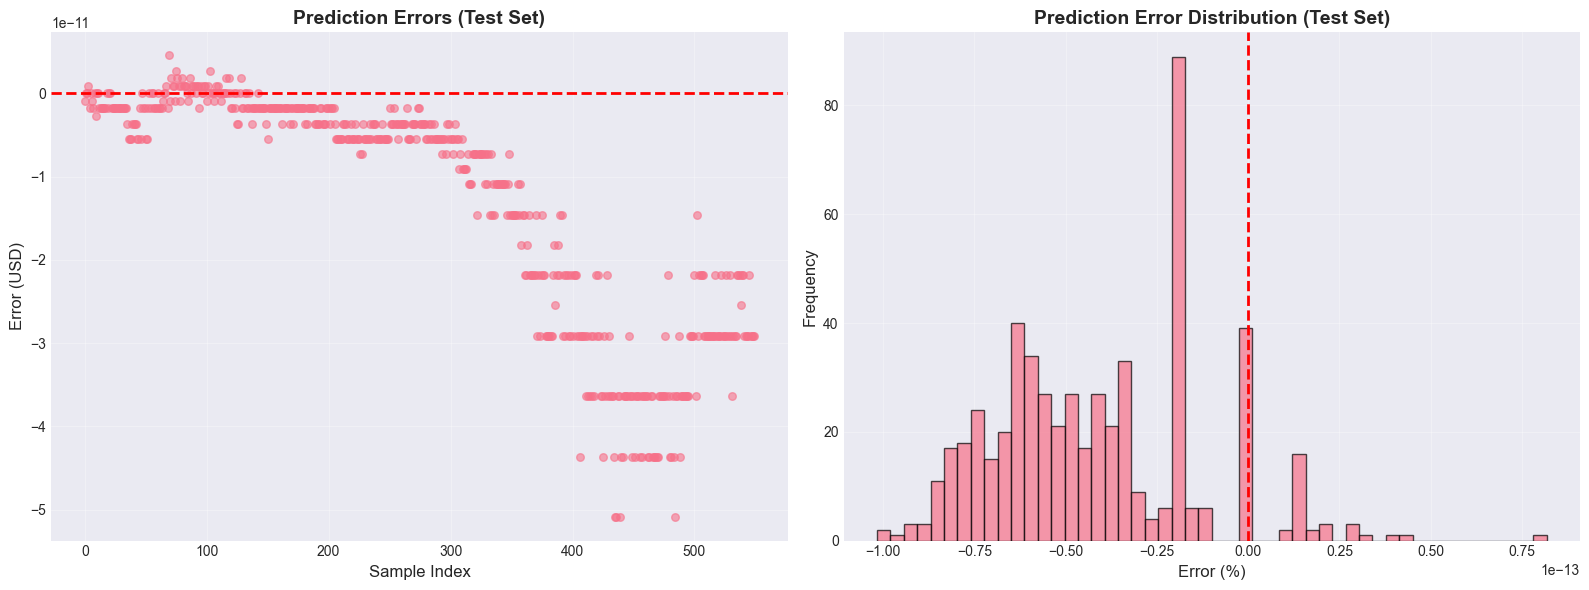

Mean Absolute Percentage Error: 0.00%


In [96]:
# Plot prediction errors
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Test set errors
test_errors = y_test.values - y_test_pred
test_error_pct = (test_errors / y_test.values) * 100

axes[0].scatter(range(len(test_errors)), test_errors, alpha=0.6, s=30)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_title('Prediction Errors (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample Index', fontsize=12)
axes[0].set_ylabel('Error (USD)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Error distribution
axes[1].hist(test_error_pct, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_title('Prediction Error Distribution (Test Set)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Error (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Absolute Percentage Error: {np.mean(np.abs(test_error_pct)):.2f}%")

In [97]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("=== Feature Importance (by Coefficient Magnitude) ===\n")
print(feature_importance.to_string(index=False))

=== Feature Importance (by Coefficient Magnitude) ===

        Feature   Coefficient  Abs_Coefficient
           Open  1.929890e+04     1.929890e+04
Open_Close_Diff  5.979199e+03     5.979199e+03
           High  1.728040e-11     1.728040e-11
            Low -1.546141e-11     1.546141e-11
  High_Low_Diff -5.002221e-12     5.002221e-12
            Day -3.759409e-12     3.759409e-12
         Volume -1.818989e-12     1.818989e-12
           MA_7 -1.818989e-12     1.818989e-12
  Volatility_30  1.364242e-12     1.364242e-12
   Volatility_7  2.273737e-13     2.273737e-13
          MA_90  0.000000e+00     0.000000e+00
          MA_30  0.000000e+00     0.000000e+00


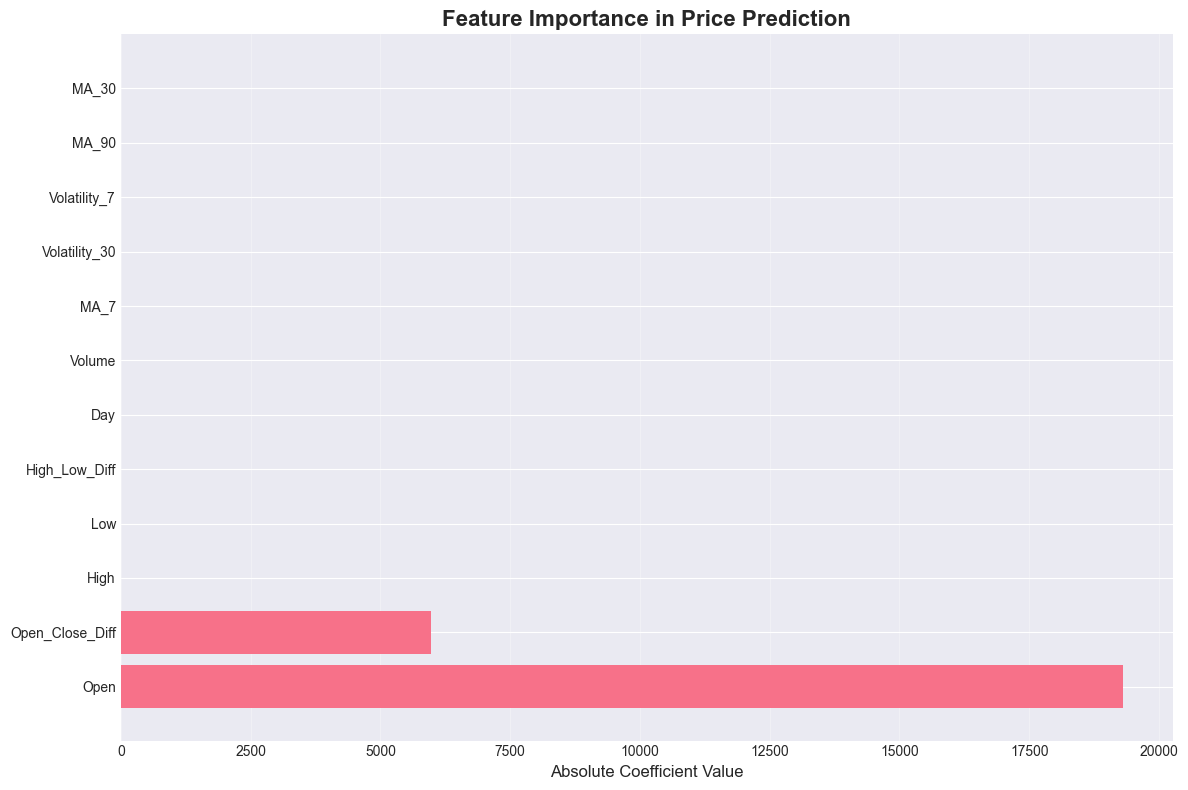

In [98]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.title('Feature Importance in Price Prediction', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [99]:
# Create a simple future prediction (next 30 days)
# Note: This is a simplified approach for demonstration

last_row = btc_df.iloc[-1]
future_predictions = []
future_dates = []

# Use the last known values as starting point
current_features = X.iloc[-1].copy()

for i in range(30):
    # Scale features
    current_features_scaled = scaler.transform(current_features.values.reshape(1, -1))
    
    # Predict
    predicted_price = lr_model.predict(current_features_scaled)[0]
    future_predictions.append(predicted_price)
    
    # Calculate next date
    next_date = last_row['Date'] + pd.Timedelta(days=i+1)
    future_dates.append(next_date)
    
    # Update features for next prediction (simplified approach)
    current_features['Day'] += 1
    # Keep other features relatively stable (this is a simplification)

# Create future dataframe
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions
})

print("=== Future Price Predictions (Next 30 Days) ===\n")
print(future_df.head(10))

=== Future Price Predictions (Next 30 Days) ===

                 Date  Predicted_Price
0 2021-07-07 23:59:59     34235.193451
1 2021-07-08 23:59:59     34235.193451
2 2021-07-09 23:59:59     34235.193451
3 2021-07-10 23:59:59     34235.193451
4 2021-07-11 23:59:59     34235.193451
5 2021-07-12 23:59:59     34235.193451
6 2021-07-13 23:59:59     34235.193451
7 2021-07-14 23:59:59     34235.193451
8 2021-07-15 23:59:59     34235.193451
9 2021-07-16 23:59:59     34235.193451


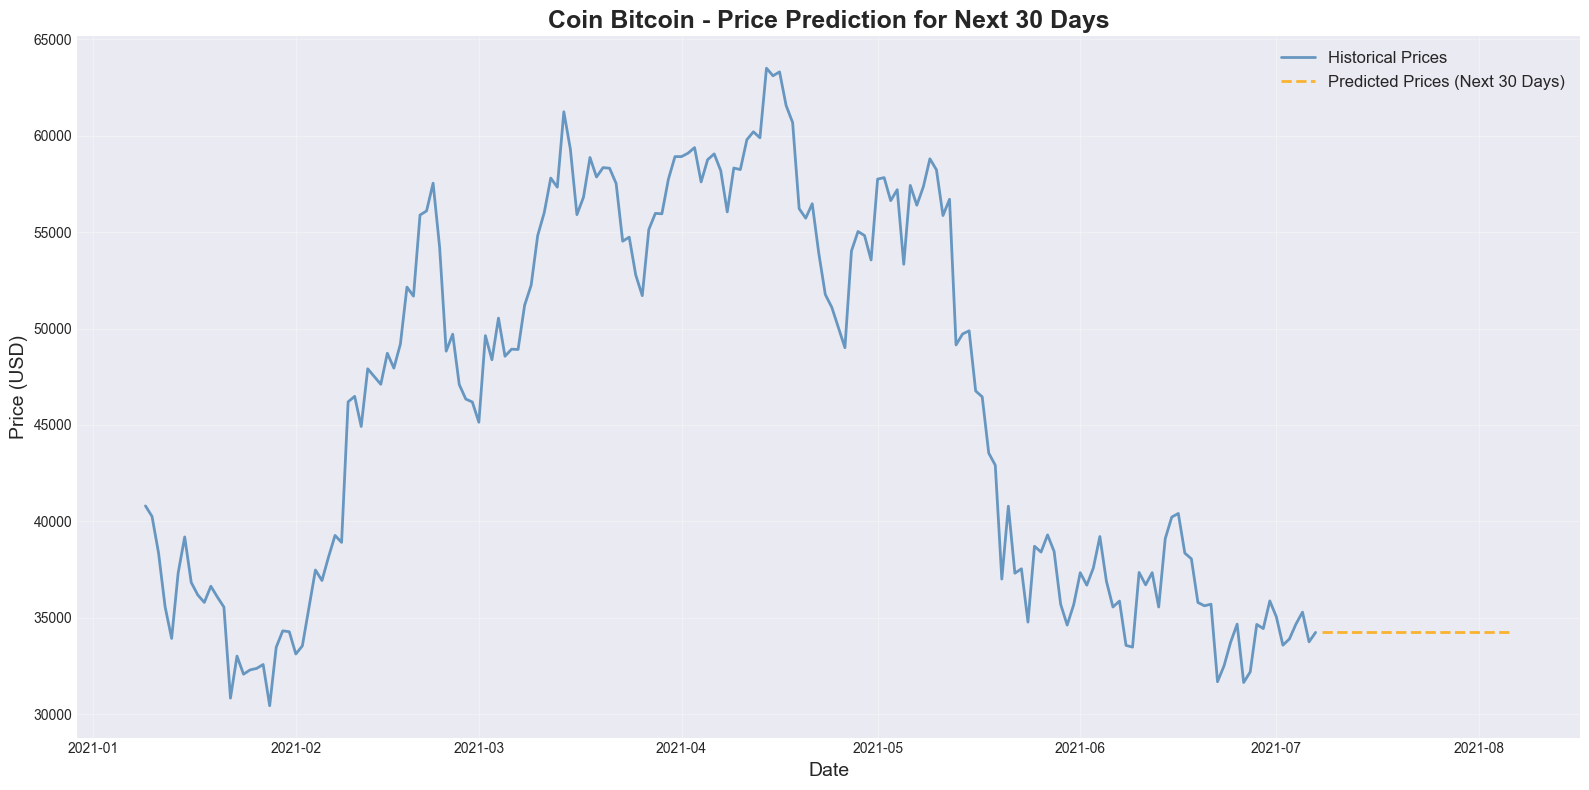

In [100]:
# Visualize future predictions
plt.figure(figsize=(16, 8))

# Plot historical prices
historical_dates = btc_df['Date'].tail(180)
historical_prices = btc_df['Close'].tail(180)
plt.plot(historical_dates, historical_prices, label='Historical Prices', 
        linewidth=2, alpha=0.8, color='steelblue')

# Plot predictions
plt.plot(future_df['Date'], future_df['Predicted_Price'], 
        label='Predicted Prices (Next 30 Days)', 
        linewidth=2, alpha=0.8, color='orange', linestyle='--')

plt.title(f'{bitcoin_key} - Price Prediction for Next 30 Days', 
         fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Volatility Analysis

Calculate volatility metrics (standard deviation, percentage changes) for different cryptocurrencies to identify which are more volatile and which are more stable.

In [101]:
# Calculate volatility metrics for all cryptocurrencies
volatility_metrics = []

for crypto_name, df in crypto_data.items():
    # Daily returns
    daily_returns = df['Close'].pct_change().dropna()
    
    # Calculate various volatility measures
    metrics = {
        'Cryptocurrency': crypto_name,
        'Std Dev (Daily Returns)': daily_returns.std(),
        'Mean Daily Return (%)': daily_returns.mean() * 100,
        'Volatility (Annualized)': daily_returns.std() * np.sqrt(365) * 100,
        'Max Daily Gain (%)': daily_returns.max() * 100,
        'Max Daily Loss (%)': daily_returns.min() * 100,
        'Coefficient of Variation': (daily_returns.std() / daily_returns.mean()) if daily_returns.mean() != 0 else np.nan
    }
    
    volatility_metrics.append(metrics)

volatility_df = pd.DataFrame(volatility_metrics)
volatility_df = volatility_df.sort_values('Volatility (Annualized)', ascending=False)

print("=== Volatility Analysis ===\n")
print(volatility_df.to_string(index=False))

=== Volatility Analysis ===

     Cryptocurrency  Std Dev (Daily Returns)  Mean Daily Return (%)  Volatility (Annualized)  Max Daily Gain (%)  Max Daily Loss (%)  Coefficient of Variation
      Coin Dogecoin                 0.113458               0.662165               216.761901          355.571209          -44.069044                 17.134459
          Coin Tron                 0.095264               0.656270               182.001834          119.607019          -40.737688                 14.515983
        Coin Solana                 0.094507               1.279514               180.555790           47.282788          -37.208763                  7.386183
       Coin Uniswap                 0.091299               0.803122               174.426375           46.276792          -33.200451                 11.368002
      Coin Polkadot                 0.087181               0.901768               166.558158           55.987689          -37.933520                  9.667738
           Coin N

In [102]:
# Categorize cryptocurrencies by volatility
median_volatility = volatility_df['Volatility (Annualized)'].median()

print(f"\nMedian Volatility: {median_volatility:.2f}%\n")
print("=== Volatility Categories ===\n")

print("HIGH VOLATILITY (Above Median):")
high_vol = volatility_df[volatility_df['Volatility (Annualized)'] > median_volatility]
for _, row in high_vol.iterrows():
    print(f"  - {row['Cryptocurrency']}: {row['Volatility (Annualized)']:.2f}%")

print("\nLOW VOLATILITY (Below Median):")
low_vol = volatility_df[volatility_df['Volatility (Annualized)'] <= median_volatility]
for _, row in low_vol.iterrows():
    print(f"  - {row['Cryptocurrency']}: {row['Volatility (Annualized)']:.2f}%")


Median Volatility: 153.61%

=== Volatility Categories ===

HIGH VOLATILITY (Above Median):
  - Coin Dogecoin: 216.76%
  - Coin Tron: 182.00%
  - Coin Solana: 180.56%
  - Coin Uniswap: 174.43%
  - Coin Polkadot: 166.56%
  - Coin Nem: 166.01%
  - Coin Aave: 165.35%
  - Coin Cardano: 159.71%
  - Coin Xrp: 155.83%
  - Coin Stellar: 155.76%
  - Coin Cryptocomcoin: 155.67%

LOW VOLATILITY (Below Median):
  - Coin Chainlink: 153.61%
  - Coin Binancecoin: 152.94%
  - Coin Eos: 144.16%
  - Coin Iota: 140.52%
  - Coin Cosmos: 137.54%
  - Coin Monero: 133.42%
  - Coin Litecoin: 130.93%
  - Coin Ethereum: 120.43%
  - Coin Wrappedbitcoin: 81.88%
  - Coin Bitcoin: 81.46%
  - Coin Tether: 33.88%
  - Coin Usdcoin: 8.77%


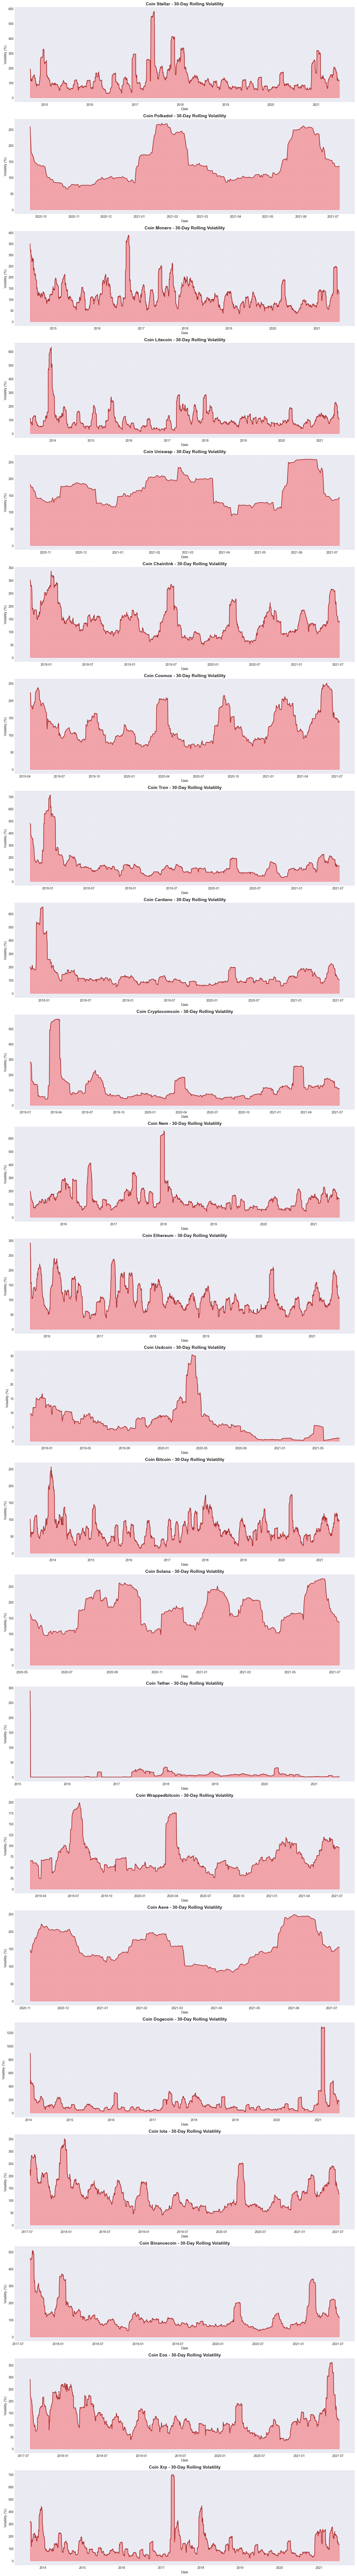

In [103]:
# Calculate rolling volatility over time for each cryptocurrency
fig, axes = plt.subplots(len(crypto_data), 1, figsize=(16, 5 * len(crypto_data)))
if len(crypto_data) == 1:
    axes = [axes]

for idx, (crypto_name, df) in enumerate(crypto_data.items()):
    daily_returns = df['Close'].pct_change()
    
    # Calculate 30-day rolling volatility
    rolling_vol = daily_returns.rolling(window=30).std() * np.sqrt(365) * 100
    
    axes[idx].plot(df['Date'], rolling_vol, linewidth=2, color='darkred', alpha=0.7)
    axes[idx].fill_between(df['Date'], rolling_vol, alpha=0.3, color='red')
    axes[idx].set_title(f'{crypto_name} - 30-Day Rolling Volatility', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=11)
    axes[idx].set_ylabel('Volatility (%)', fontsize=11)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

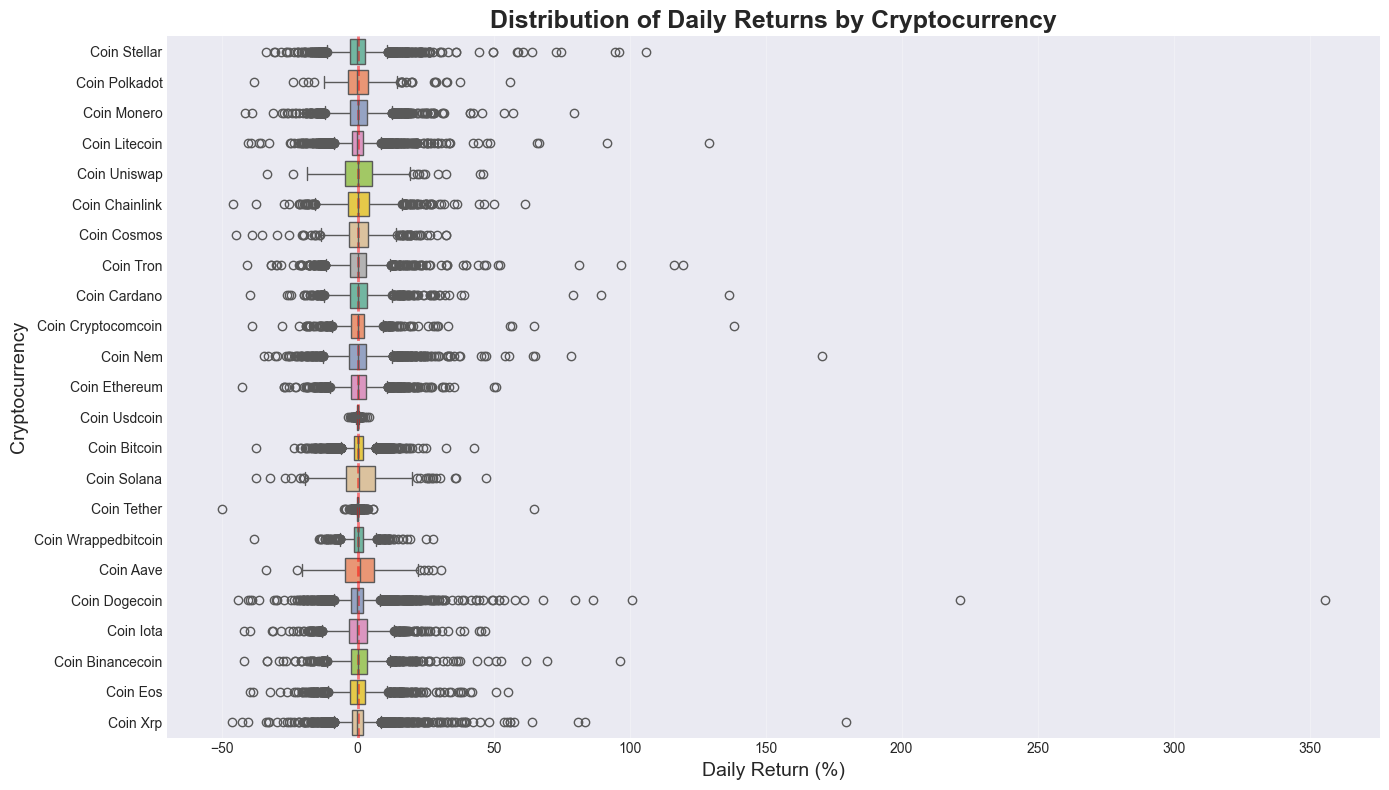

In [104]:
# Compare volatility distributions using box plots
daily_returns_dict = {}

for crypto_name, df in crypto_data.items():
    daily_returns = df['Close'].pct_change().dropna() * 100  # Convert to percentage
    daily_returns_dict[crypto_name] = daily_returns

# Create DataFrame for box plot
returns_data = []
for crypto_name, returns in daily_returns_dict.items():
    for ret in returns:
        returns_data.append({'Cryptocurrency': crypto_name, 'Daily Return (%)': ret})

returns_plot_df = pd.DataFrame(returns_data)

plt.figure(figsize=(14, 8))
sns.boxplot(data=returns_plot_df, y='Cryptocurrency', x='Daily Return (%)', 
           palette='Set2', orient='h')
plt.title('Distribution of Daily Returns by Cryptocurrency', fontsize=18, fontweight='bold')
plt.xlabel('Daily Return (%)', fontsize=14)
plt.ylabel('Cryptocurrency', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

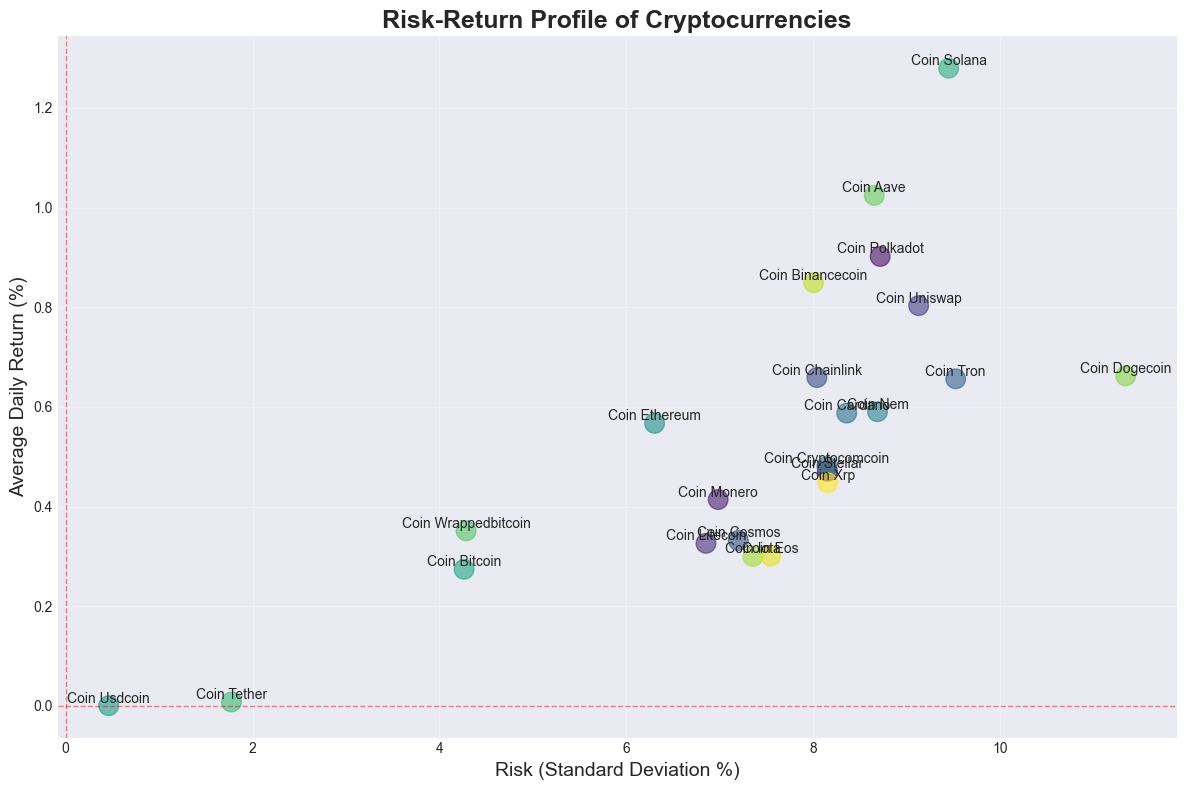

In [105]:
# Calculate and visualize risk-return profile
risk_return_data = []

for crypto_name, df in crypto_data.items():
    daily_returns = df['Close'].pct_change().dropna()
    
    risk_return_data.append({
        'Cryptocurrency': crypto_name,
        'Average Daily Return (%)': daily_returns.mean() * 100,
        'Risk (Std Dev %)': daily_returns.std() * 100
    })

risk_return_df = pd.DataFrame(risk_return_data)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(risk_return_df['Risk (Std Dev %)'], 
                     risk_return_df['Average Daily Return (%)'],
                     s=200, alpha=0.6, c=range(len(risk_return_df)), cmap='viridis')

# Add labels for each point
for idx, row in risk_return_df.iterrows():
    plt.annotate(row['Cryptocurrency'], 
                (row['Risk (Std Dev %)'], row['Average Daily Return (%)']),
                fontsize=10, ha='center', va='bottom')

plt.xlabel('Risk (Standard Deviation %)', fontsize=14)
plt.ylabel('Average Daily Return (%)', fontsize=14)
plt.title('Risk-Return Profile of Cryptocurrencies', fontsize=18, fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [106]:
# Calculate downside volatility (negative returns only)
downside_metrics = []

for crypto_name, df in crypto_data.items():
    daily_returns = df['Close'].pct_change().dropna()
    negative_returns = daily_returns[daily_returns < 0]
    
    downside_metrics.append({
        'Cryptocurrency': crypto_name,
        'Downside Volatility': negative_returns.std() * np.sqrt(365) * 100,
        'Negative Days (%)': (len(negative_returns) / len(daily_returns)) * 100,
        'Average Loss (%)': negative_returns.mean() * 100 if len(negative_returns) > 0 else 0
    })

downside_df = pd.DataFrame(downside_metrics)
downside_df = downside_df.sort_values('Downside Volatility', ascending=False)

print("\n=== Downside Risk Analysis ===\n")
print(downside_df.to_string(index=False))


=== Downside Risk Analysis ===

     Cryptocurrency  Downside Volatility  Negative Days (%)  Average Loss (%)
        Coin Solana           105.389461          47.450111         -5.895664
          Coin Aave            96.324812          46.715328         -6.038483
        Coin Cosmos            95.823106          49.763033         -4.710906
          Coin Tron            94.635987          49.532710         -4.594746
           Coin Eos            93.883916          50.580205         -4.382934
          Coin Iota            93.364530          50.573163         -4.588011
       Coin Uniswap            92.600219          49.828179         -5.794425
      Coin Polkadot            92.454743          51.097179         -4.785673
     Coin Chainlink            90.562837          49.855491         -4.924038
   Coin Binancecoin            88.123337          47.605829         -4.037516
      Coin Dogecoin            87.817120          52.917724         -3.706308
           Coin Nem            

## 7. Correlation Analysis Between Cryptocurrencies

Compute correlation coefficients between different cryptocurrencies' price movements and visualize the results using correlation matrices and heatmaps.

In [107]:
# Create a DataFrame with closing prices of all cryptocurrencies
# First, find common dates across all cryptocurrencies
common_dates = None

for crypto_name, df in crypto_data.items():
    dates = set(df['Date'].tolist())
    if common_dates is None:
        common_dates = dates
    else:
        common_dates = common_dates.intersection(dates)

print(f"Number of common dates across all cryptocurrencies: {len(common_dates)}")

# Create a unified DataFrame
price_data = pd.DataFrame()

for crypto_name, df in crypto_data.items():
    # Filter for common dates and sort
    filtered_df = df[df['Date'].isin(common_dates)].sort_values('Date')
    
    if price_data.empty:
        price_data['Date'] = filtered_df['Date'].values
    
    price_data[crypto_name] = filtered_df['Close'].values

price_data = price_data.set_index('Date')

print(f"\nUnified price data shape: {price_data.shape}")
print(f"Date range: {price_data.index.min()} to {price_data.index.max()}")

Number of common dates across all cryptocurrencies: 275

Unified price data shape: (275, 23)
Date range: 2020-10-05 23:59:59 to 2021-07-06 23:59:59


In [108]:
# Display sample of unified price data
print("=== Sample of Unified Price Data ===\n")
print(price_data.head(10))

=== Sample of Unified Price Data ===

                     Coin Stellar  Coin Polkadot  Coin Monero  Coin Litecoin  \
Date                                                                           
2020-10-05 23:59:59      0.073419       4.172700   112.903248      46.363226   
2020-10-06 23:59:59      0.072501       3.756162   106.665996      45.985530   
2020-10-07 23:59:59      0.072301       3.858798   109.989031      46.660479   
2020-10-08 23:59:59      0.073095       4.102642   110.909933      47.218381   
2020-10-09 23:59:59      0.075144       4.262468   116.034673      47.832955   
2020-10-10 23:59:59      0.077373       4.252955   115.837481      48.921096   
2020-10-11 23:59:59      0.077229       4.262162   125.921878      50.727902   
2020-10-12 23:59:59      0.077683       4.319948   129.581438      50.743818   
2020-10-13 23:59:59      0.076345       4.249400   127.777692      49.940641   
2020-10-14 23:59:59      0.074283       4.199114   128.701737      49.846490   

 

In [109]:
# Calculate correlation matrix for prices
price_correlation = price_data.corr()

print("=== Price Correlation Matrix ===\n")
print(price_correlation)

=== Price Correlation Matrix ===

                     Coin Stellar  Coin Polkadot  Coin Monero  Coin Litecoin  \
Coin Stellar             1.000000       0.931848     0.865225       0.957043   
Coin Polkadot            0.931848       1.000000     0.813679       0.900418   
Coin Monero              0.865225       0.813679     1.000000       0.914084   
Coin Litecoin            0.957043       0.900418     0.914084       1.000000   
Coin Uniswap             0.918157       0.950621     0.891543       0.906218   
Coin Chainlink           0.960439       0.927768     0.902751       0.959901   
Coin Cosmos              0.933246       0.968965     0.862798       0.913861   
Coin Tron                0.840596       0.801640     0.936398       0.865126   
Coin Cardano             0.830189       0.819899     0.836849       0.793749   
Coin Cryptocomcoin       0.656222       0.812154     0.675782       0.649867   
Coin Nem                 0.648752       0.739647     0.418272       0.600152   
Coin E

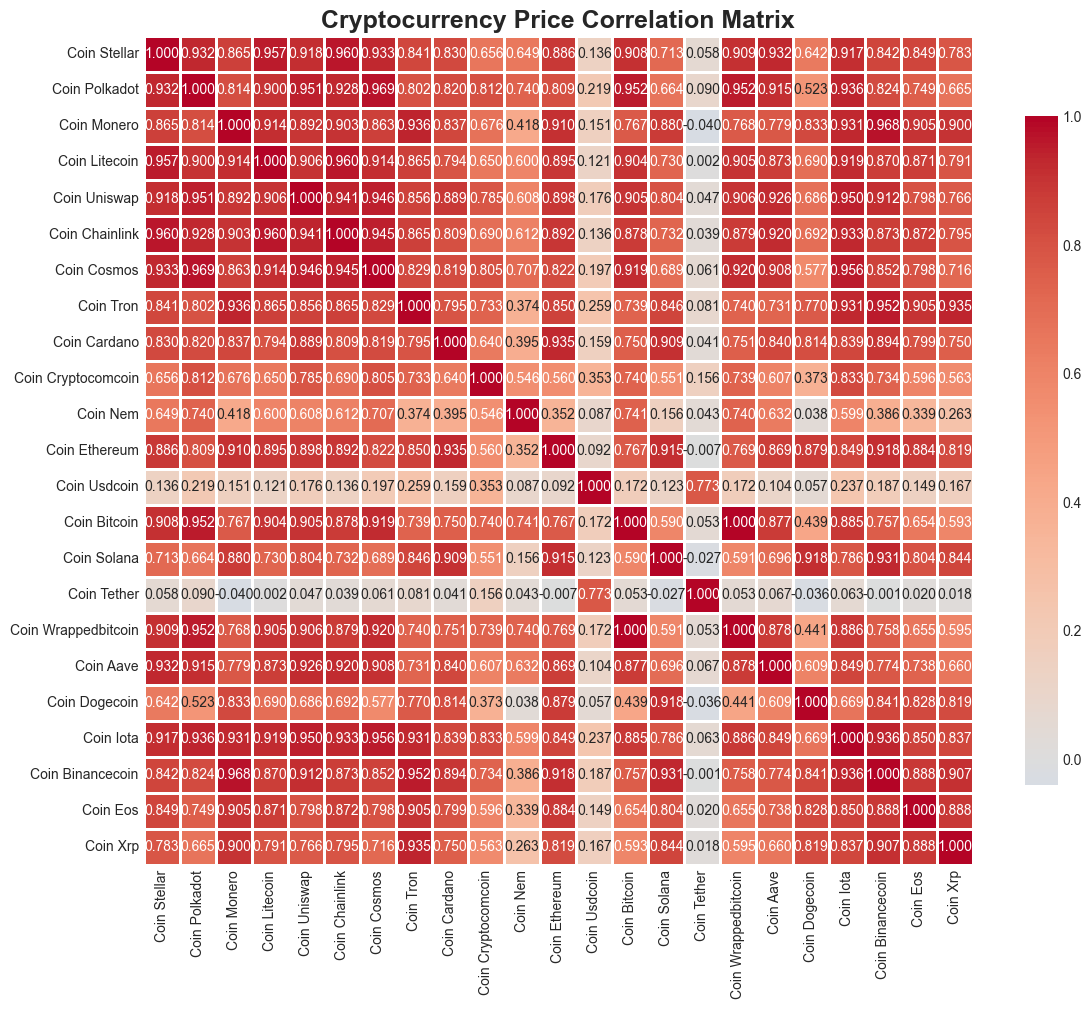

In [110]:
# Visualize price correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', center=0, 
           fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cryptocurrency Price Correlation Matrix', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [111]:
# Calculate correlation matrix for daily returns
returns_data = price_data.pct_change().dropna()

returns_correlation = returns_data.corr()

print("\n=== Daily Returns Correlation Matrix ===\n")
print(returns_correlation)


=== Daily Returns Correlation Matrix ===

                     Coin Stellar  Coin Polkadot  Coin Monero  Coin Litecoin  \
Coin Stellar             1.000000       0.445250     0.451276       0.560313   
Coin Polkadot            0.445250       1.000000     0.535956       0.656686   
Coin Monero              0.451276       0.535956     1.000000       0.643112   
Coin Litecoin            0.560313       0.656686     0.643112       1.000000   
Coin Uniswap             0.358620       0.597551     0.375811       0.532330   
Coin Chainlink           0.600250       0.660200     0.584084       0.762714   
Coin Cosmos              0.525464       0.671848     0.578877       0.585473   
Coin Tron                0.575813       0.586715     0.560171       0.659906   
Coin Cardano             0.659297       0.611840     0.510885       0.586335   
Coin Cryptocomcoin       0.485536       0.507308     0.403761       0.547240   
Coin Nem                 0.584596       0.502192     0.480514       0.524390 

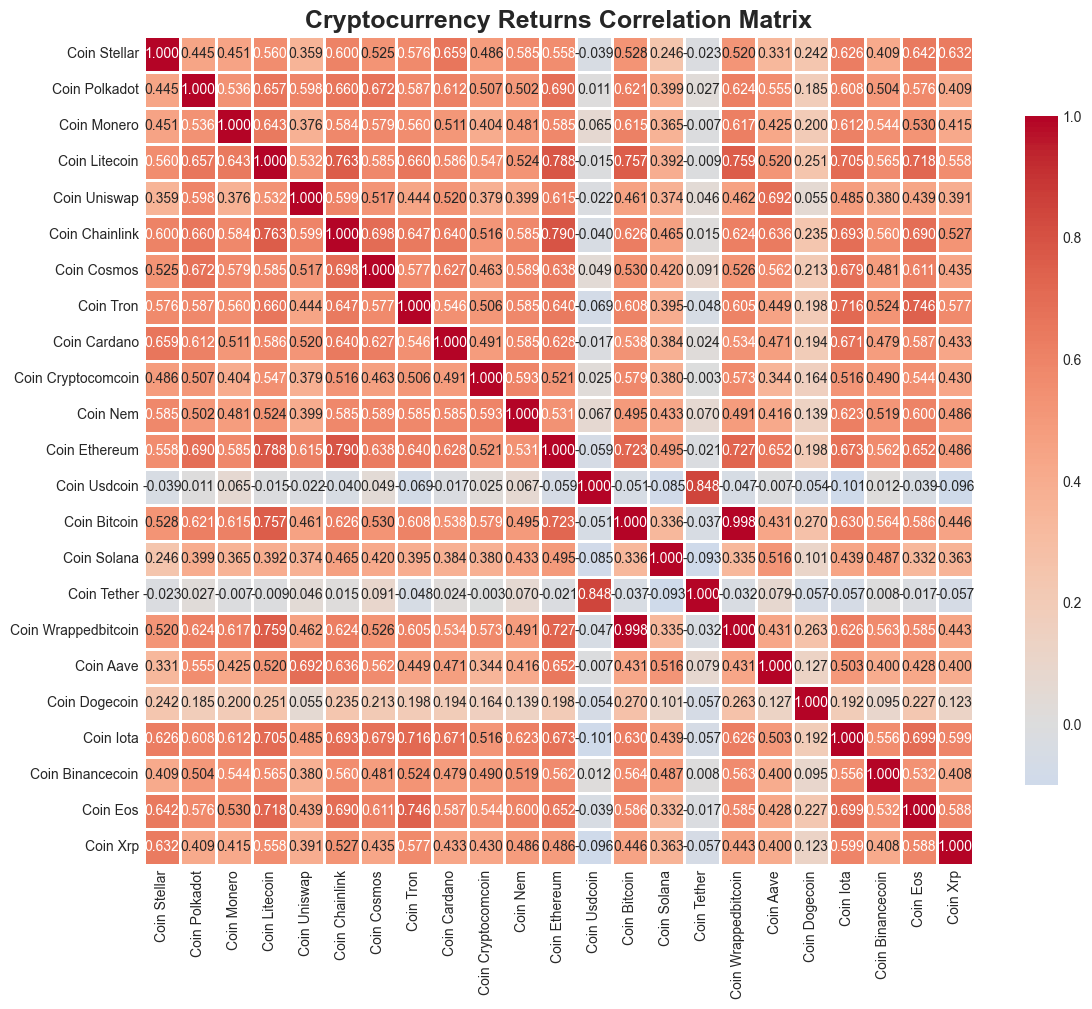

In [112]:
# Visualize returns correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(returns_correlation, annot=True, cmap='coolwarm', center=0, 
           fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cryptocurrency Returns Correlation Matrix', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [113]:
# Find the most and least correlated pairs
if len(crypto_data) > 1:
    correlation_pairs = []
    
    cryptos = list(price_data.columns)
    for i in range(len(cryptos)):
        for j in range(i+1, len(cryptos)):
            correlation_pairs.append({
                'Pair': f"{cryptos[i]} - {cryptos[j]}",
                'Price Correlation': price_correlation.iloc[i, j],
                'Returns Correlation': returns_correlation.iloc[i, j]
            })
    
    pairs_df = pd.DataFrame(correlation_pairs)
    pairs_df = pairs_df.sort_values('Returns Correlation', ascending=False)
    
    print("\n=== Cryptocurrency Pair Correlations ===\n")
    print(pairs_df.to_string(index=False))


=== Cryptocurrency Pair Correlations ===

                                    Pair  Price Correlation  Returns Correlation
      Coin Bitcoin - Coin Wrappedbitcoin           0.999979             0.997804
              Coin Usdcoin - Coin Tether           0.772756             0.847915
          Coin Chainlink - Coin Ethereum           0.892315             0.789563
           Coin Litecoin - Coin Ethereum           0.895122             0.788242
          Coin Litecoin - Coin Chainlink           0.959901             0.762714
     Coin Litecoin - Coin Wrappedbitcoin           0.904967             0.759115
            Coin Litecoin - Coin Bitcoin           0.903820             0.757063
                    Coin Tron - Coin Eos           0.904968             0.746142
     Coin Ethereum - Coin Wrappedbitcoin           0.768954             0.727213
            Coin Ethereum - Coin Bitcoin           0.767453             0.722806
                Coin Litecoin - Coin Eos           0.870553       

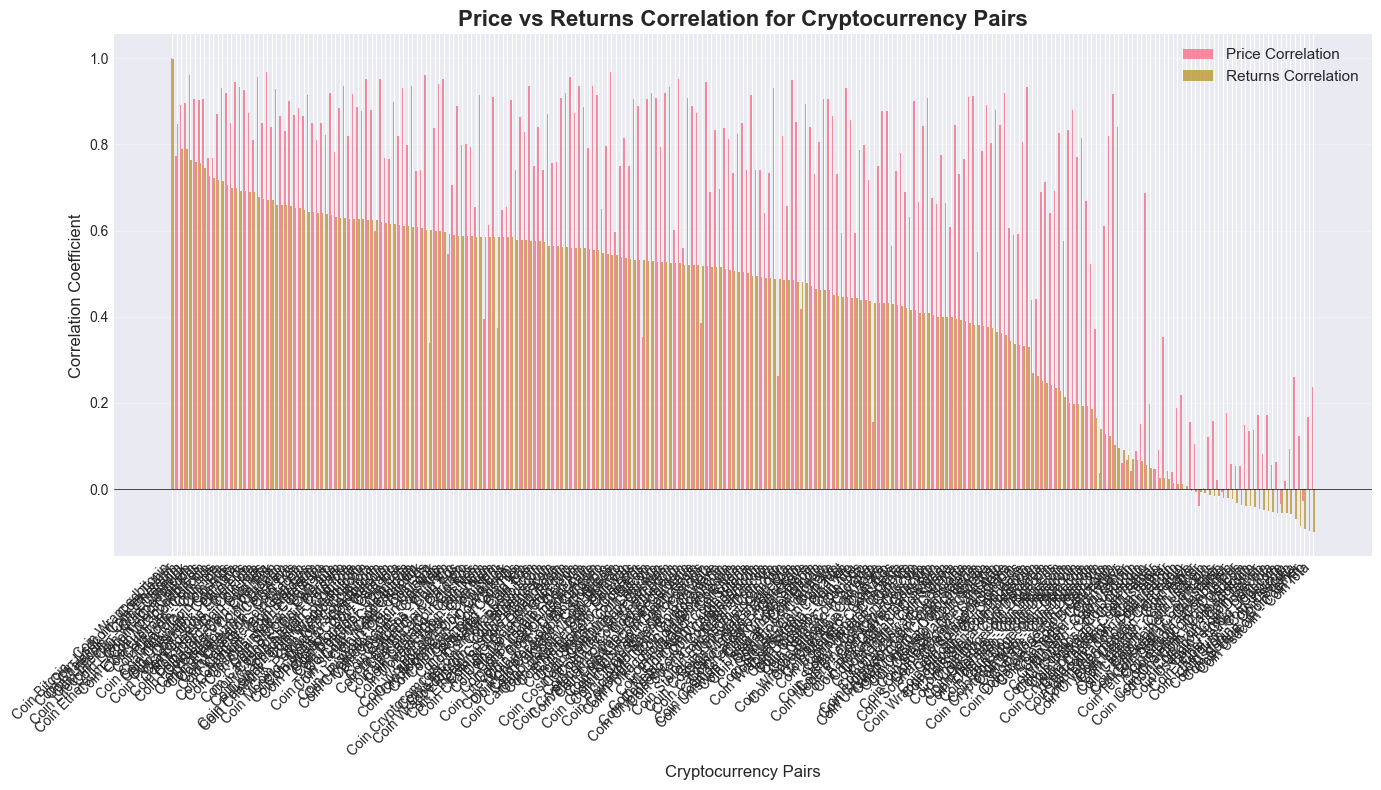

In [114]:
# Visualize correlation pairs
if len(crypto_data) > 1:
    plt.figure(figsize=(14, 8))
    
    x = range(len(pairs_df))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], pairs_df['Price Correlation'], 
           width, label='Price Correlation', alpha=0.8)
    plt.bar([i + width/2 for i in x], pairs_df['Returns Correlation'], 
           width, label='Returns Correlation', alpha=0.8)
    
    plt.xlabel('Cryptocurrency Pairs', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)
    plt.title('Price vs Returns Correlation for Cryptocurrency Pairs', 
             fontsize=16, fontweight='bold')
    plt.xticks(x, pairs_df['Pair'], rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    plt.legend(fontsize=11)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

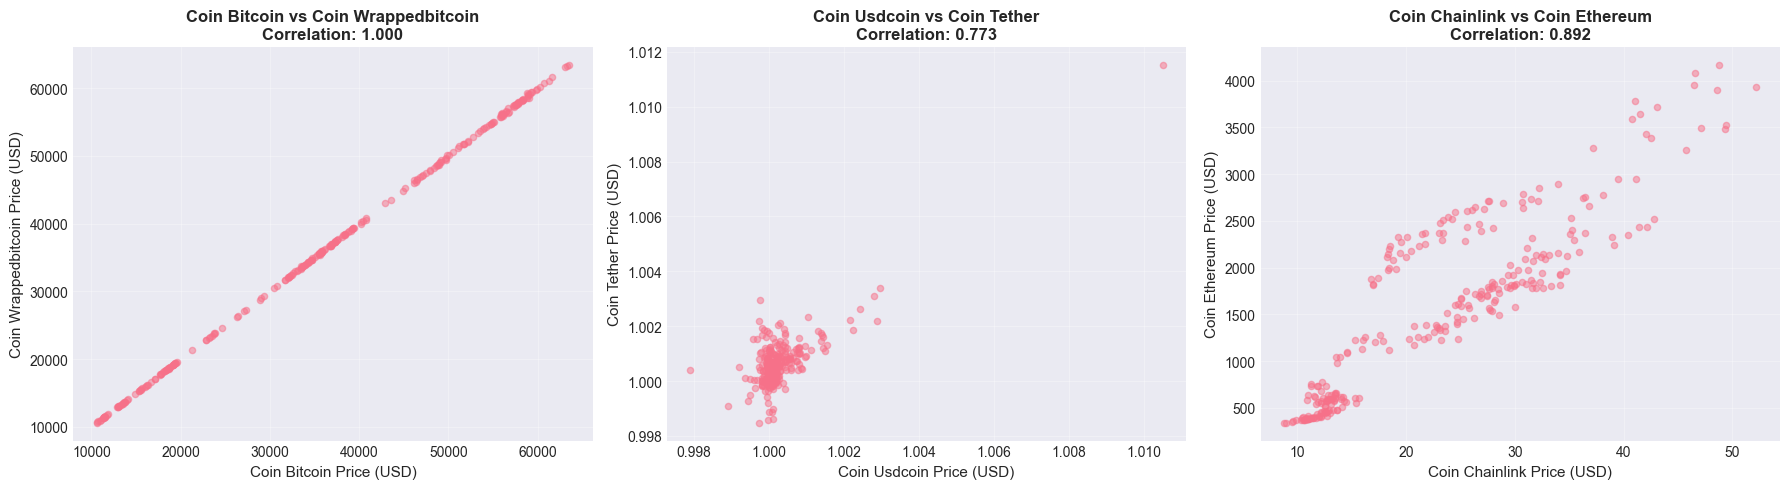

In [115]:
# Create scatter plots for highly correlated pairs
if len(crypto_data) > 1:
    # Select top 3 most correlated pairs
    top_pairs = pairs_df.nlargest(min(3, len(pairs_df)), 'Returns Correlation')
    
    fig, axes = plt.subplots(1, min(3, len(top_pairs)), figsize=(18, 5))
    if len(top_pairs) == 1:
        axes = [axes]
    
    for idx, (_, row) in enumerate(top_pairs.iterrows()):
        if idx >= 3:
            break
            
        crypto1, crypto2 = row['Pair'].split(' - ')
        
        axes[idx].scatter(price_data[crypto1], price_data[crypto2], alpha=0.5, s=20)
        axes[idx].set_xlabel(f'{crypto1} Price (USD)', fontsize=11)
        axes[idx].set_ylabel(f'{crypto2} Price (USD)', fontsize=11)
        axes[idx].set_title(f'{crypto1} vs {crypto2}\nCorrelation: {row["Price Correlation"]:.3f}', 
                          fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

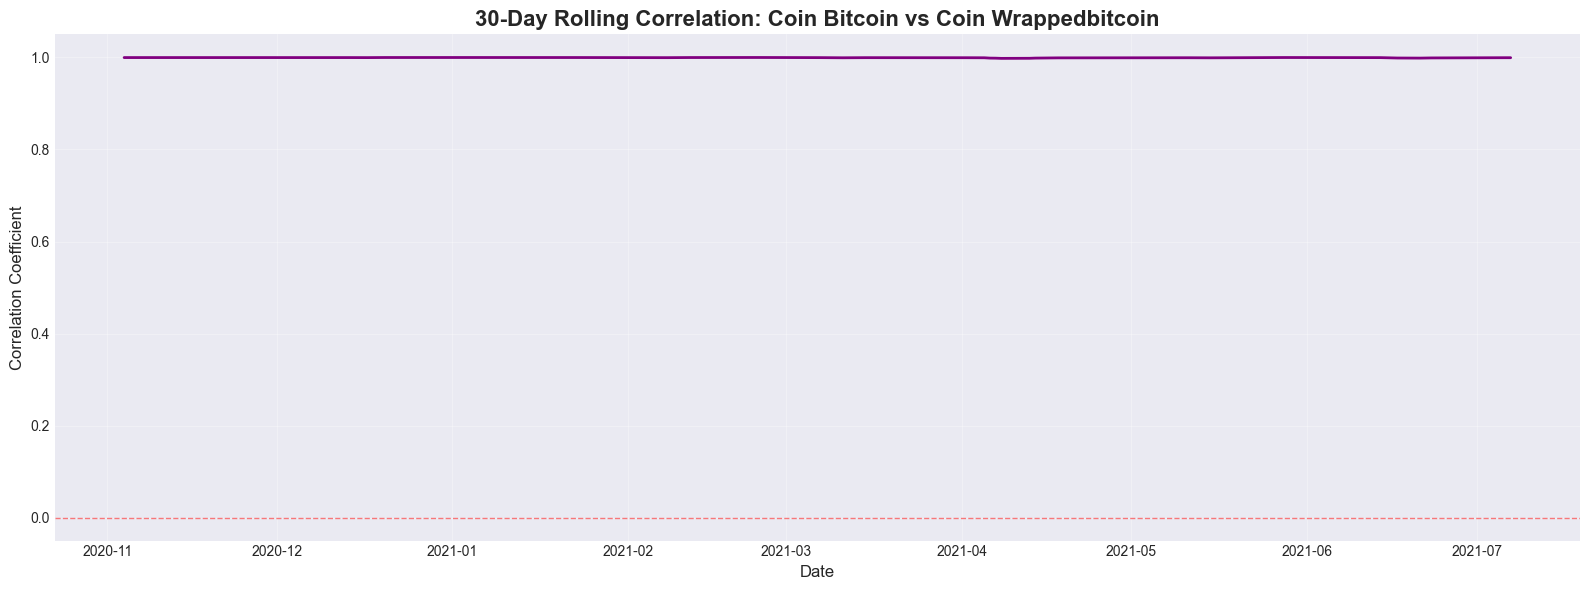

In [116]:
# Calculate rolling correlation (30-day window) between pairs
if len(crypto_data) > 1 and len(pairs_df) > 0:
    # Select first pair for demonstration
    crypto1, crypto2 = pairs_df.iloc[0]['Pair'].split(' - ')
    
    # Calculate rolling correlation
    rolling_corr = price_data[crypto1].rolling(window=30).corr(price_data[crypto2])
    
    plt.figure(figsize=(16, 6))
    plt.plot(rolling_corr.index, rolling_corr.values, linewidth=2, color='purple')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
    plt.title(f'30-Day Rolling Correlation: {crypto1} vs {crypto2}', 
             fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

<Figure size 1200x1000 with 0 Axes>

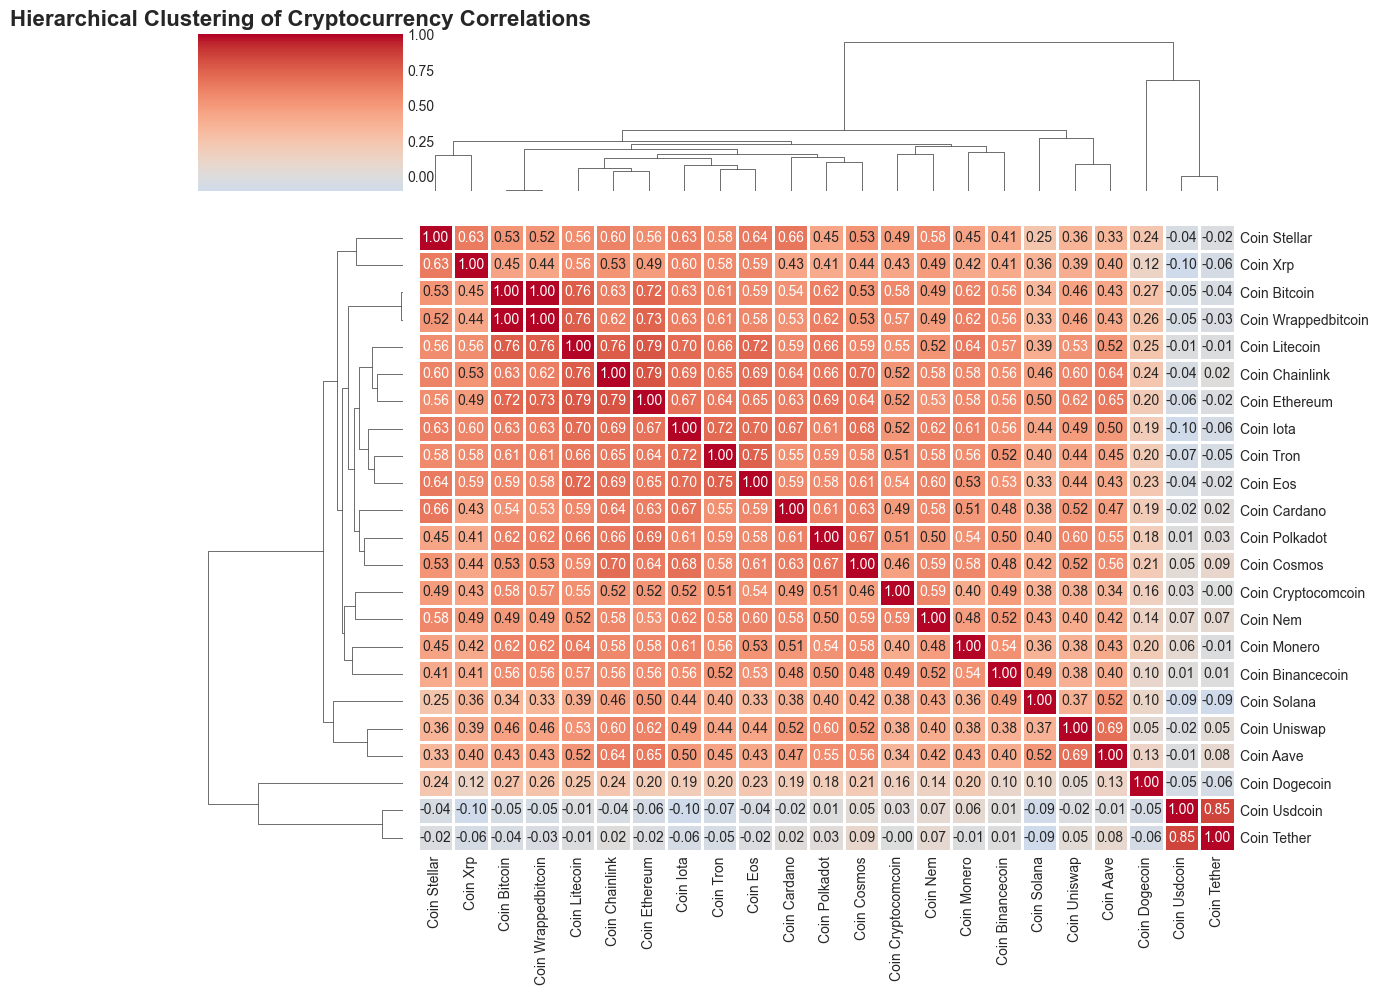

In [117]:
# Create a clustermap to show hierarchical clustering based on correlation
plt.figure(figsize=(12, 10))
sns.clustermap(returns_correlation, annot=True, cmap='coolwarm', center=0,
              fmt='.2f', linewidths=1, figsize=(12, 10),
              cbar_kws={"shrink": 0.8})
plt.title('Hierarchical Clustering of Cryptocurrency Correlations', 
         fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Seasonal Trend Analysis

Analyze seasonal patterns in cryptocurrency price fluctuations using time series decomposition, moving averages, and visualizations grouped by month, quarter, or year.

In [118]:
# Prepare data for seasonal analysis (using Bitcoin as example)
btc_seasonal = crypto_data[bitcoin_key].copy()
btc_seasonal['Date'] = pd.to_datetime(btc_seasonal['Date'])
btc_seasonal = btc_seasonal.set_index('Date')
btc_seasonal = btc_seasonal.sort_index()

# Extract time components
btc_seasonal['Year'] = btc_seasonal.index.year
btc_seasonal['Month'] = btc_seasonal.index.month
btc_seasonal['Quarter'] = btc_seasonal.index.quarter
btc_seasonal['DayOfWeek'] = btc_seasonal.index.dayofweek
btc_seasonal['DayOfYear'] = btc_seasonal.index.dayofyear
btc_seasonal['WeekOfYear'] = btc_seasonal.index.isocalendar().week

print(f"=== Seasonal Analysis Data for {bitcoin_key} ===")
print(f"Date range: {btc_seasonal.index.min()} to {btc_seasonal.index.max()}")
print(f"Total observations: {len(btc_seasonal)}")

=== Seasonal Analysis Data for Coin Bitcoin ===
Date range: 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Total observations: 2991


In [119]:
# Display sample with seasonal features
print("\n=== Sample Data with Seasonal Features ===\n")
print(btc_seasonal[['Close', 'Year', 'Month', 'Quarter', 'DayOfWeek']].head(10))


=== Sample Data with Seasonal Features ===

                          Close  Year  Month  Quarter  DayOfWeek
Date                                                            
2013-04-29 23:59:59  144.539993  2013      4        2          0
2013-04-30 23:59:59  139.000000  2013      4        2          1
2013-05-01 23:59:59  116.989998  2013      5        2          2
2013-05-02 23:59:59  105.209999  2013      5        2          3
2013-05-03 23:59:59   97.750000  2013      5        2          4
2013-05-04 23:59:59  112.500000  2013      5        2          5
2013-05-05 23:59:59  115.910004  2013      5        2          6
2013-05-06 23:59:59  112.300003  2013      5        2          0
2013-05-07 23:59:59  111.500000  2013      5        2          1
2013-05-08 23:59:59  113.566002  2013      5        2          2


In [120]:
# Analyze average price by month
monthly_avg = btc_seasonal.groupby('Month')['Close'].agg(['mean', 'std', 'count'])
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("\n=== Average Price by Month ===\n")
print(monthly_avg)


=== Average Price by Month ===

            mean           std  count
Jan  7794.593122  11161.741063    248
Feb  8900.845758  14745.100798    226
Mar  9661.598065  17504.852302    248
Apr  9916.183723  18128.535435    242
May  8296.456608  14290.373231    279
Jun  7309.402572  10795.430468    270
Jul  4662.263763   6210.119366    254
Aug  4294.634311   4526.074465    248
Sep  4070.568543   4182.852287    240
Oct  4196.870589   4258.117655    248
Nov  5028.558236   5511.979657    240
Dec  6334.185375   7777.240385    248


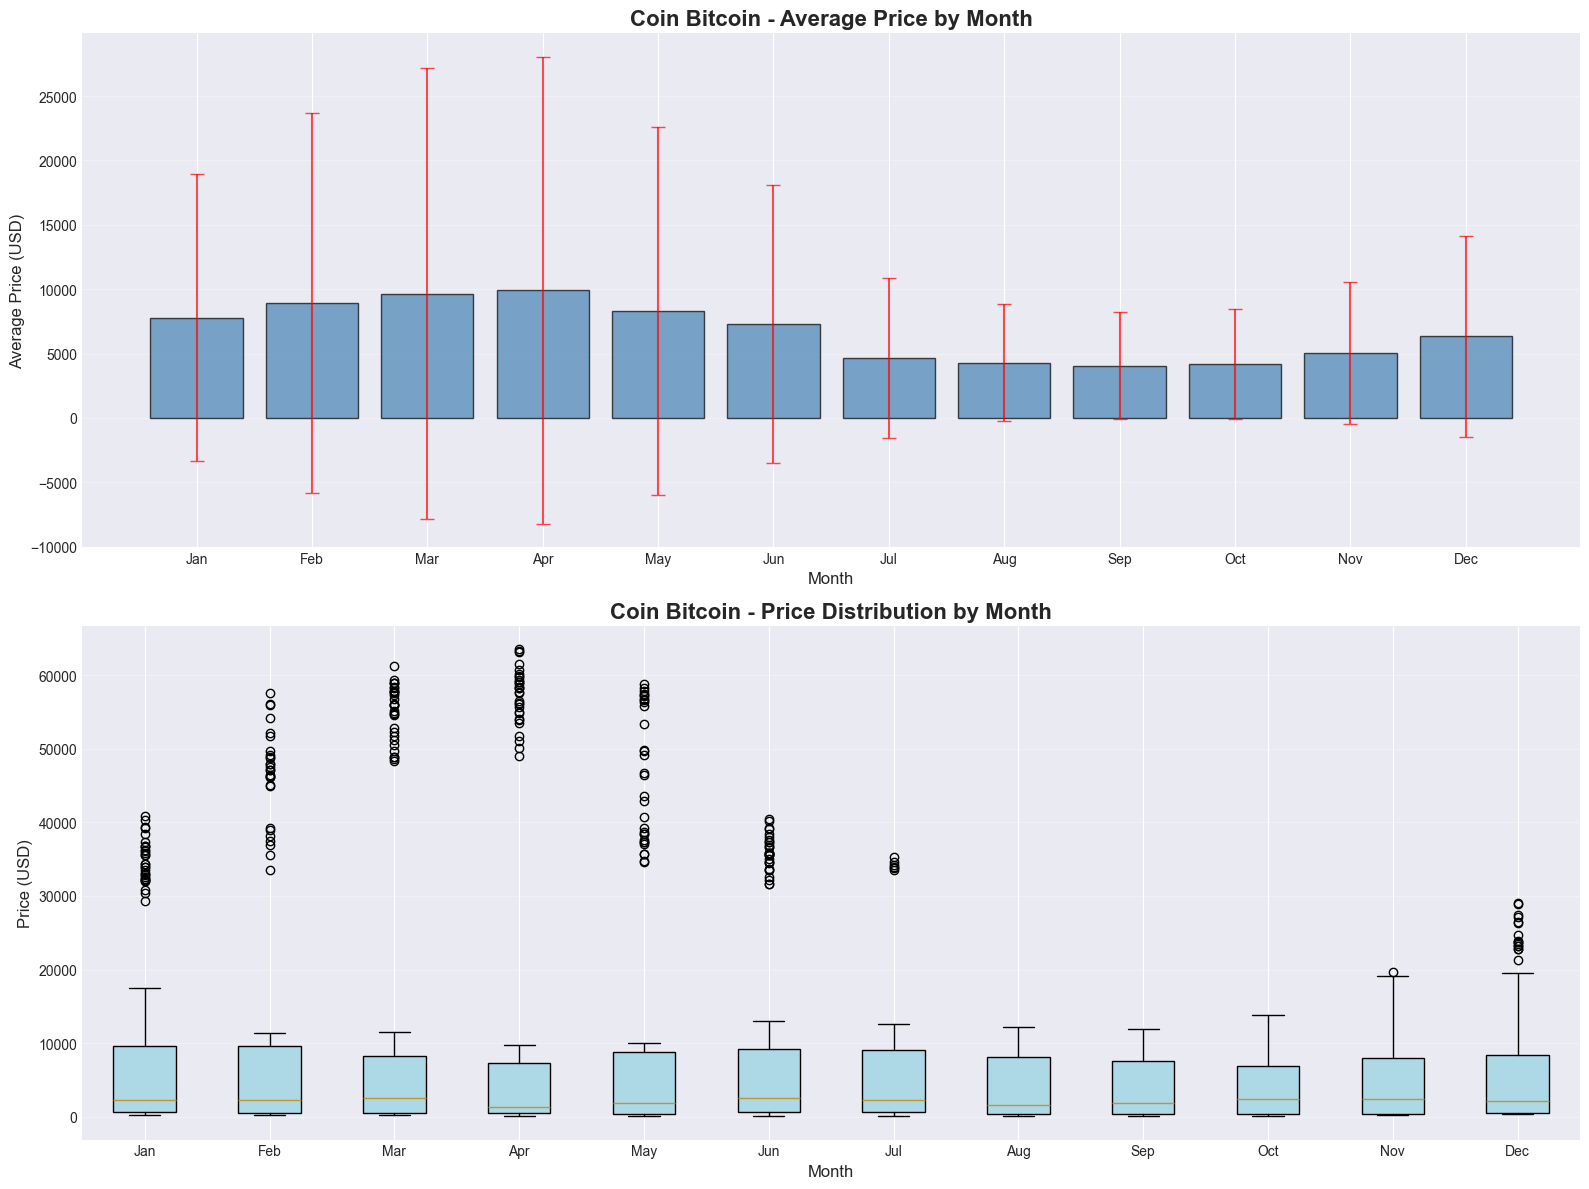

In [121]:
# Visualize monthly patterns
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Average price by month
axes[0].bar(monthly_avg.index, monthly_avg['mean'], alpha=0.7, color='steelblue', 
           edgecolor='black')
axes[0].errorbar(monthly_avg.index, monthly_avg['mean'], yerr=monthly_avg['std'], 
                fmt='none', ecolor='red', capsize=5, alpha=0.7)
axes[0].set_title(f'{bitcoin_key} - Average Price by Month', 
                 fontsize=16, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Average Price (USD)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Box plot by month
monthly_data = [btc_seasonal[btc_seasonal['Month'] == month]['Close'].values 
               for month in range(1, 13)]
bp = axes[1].boxplot(monthly_data, labels=monthly_avg.index, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[1].set_title(f'{bitcoin_key} - Price Distribution by Month', 
                 fontsize=16, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Price (USD)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


=== Average Price by Quarter ===

           mean           std  count
Q1  8782.169745  14700.617371    722
Q2  8455.077812  14591.592790    791
Q3  4348.006408   5069.402606    742
Q4  5188.255238   6089.492993    736


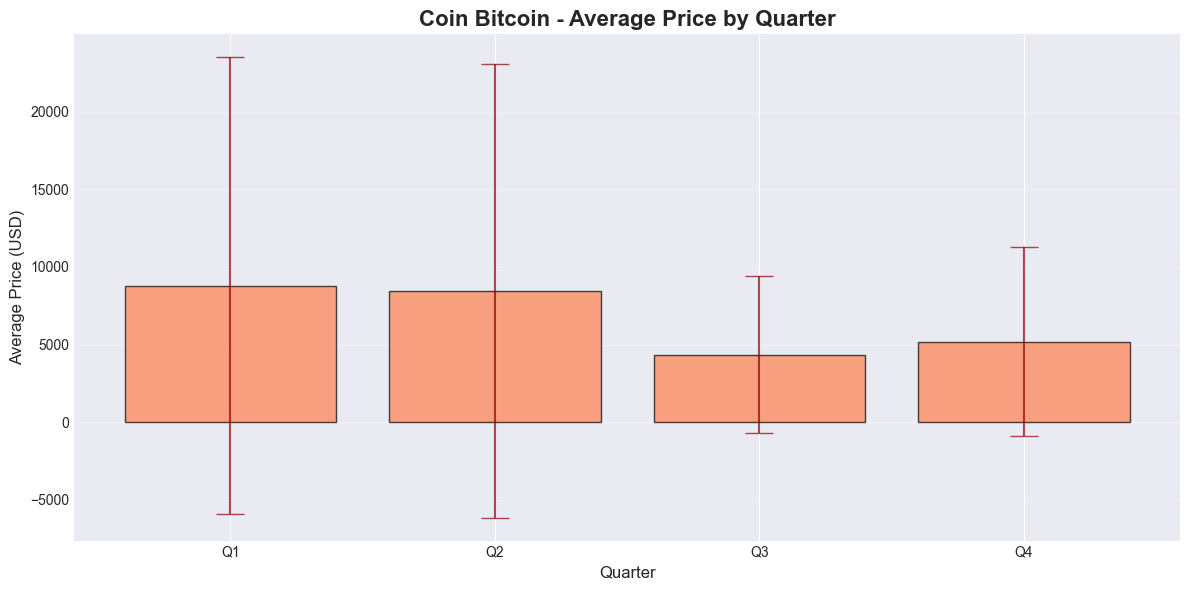

In [122]:
# Analyze average price by quarter
quarterly_avg = btc_seasonal.groupby('Quarter')['Close'].agg(['mean', 'std', 'count'])
quarterly_avg.index = ['Q1', 'Q2', 'Q3', 'Q4']

print("\n=== Average Price by Quarter ===\n")
print(quarterly_avg)

# Visualize quarterly patterns
plt.figure(figsize=(12, 6))
plt.bar(quarterly_avg.index, quarterly_avg['mean'], alpha=0.7, color='coral', 
       edgecolor='black')
plt.errorbar(quarterly_avg.index, quarterly_avg['mean'], yerr=quarterly_avg['std'], 
            fmt='none', ecolor='darkred', capsize=10, alpha=0.7)
plt.title(f'{bitcoin_key} - Average Price by Quarter', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


=== Average Daily Return by Day of Week ===

               mean       std  count
Monday     0.734236  4.700608    427
Tuesday    0.303124  4.091998    428
Wednesday  0.108980  4.542829    427
Thursday   0.154833  5.334089    427
Friday     0.219479  4.061670    427
Saturday   0.323781  3.396625    427
Sunday     0.073932  3.355945    427


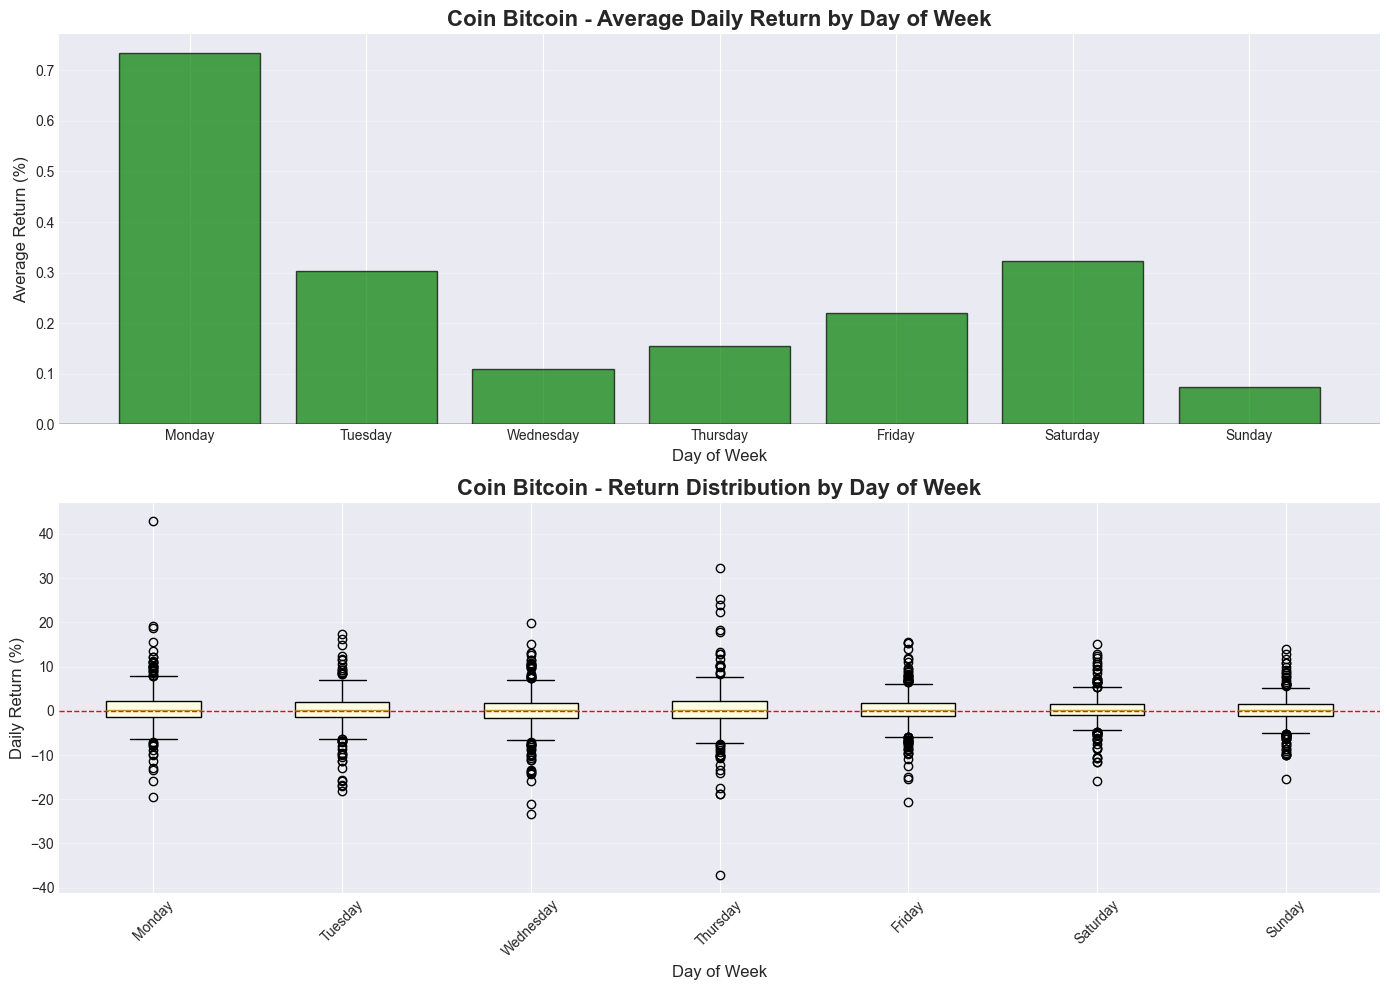

In [123]:
# Analyze average returns by day of week
btc_seasonal['Daily_Return'] = btc_seasonal['Close'].pct_change() * 100

dow_avg = btc_seasonal.groupby('DayOfWeek')['Daily_Return'].agg(['mean', 'std', 'count'])
dow_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print("\n=== Average Daily Return by Day of Week ===\n")
print(dow_avg)

# Visualize day of week patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Average returns
colors = ['green' if x > 0 else 'red' for x in dow_avg['mean']]
axes[0].bar(dow_avg.index, dow_avg['mean'], alpha=0.7, color=colors, edgecolor='black')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0].set_title(f'{bitcoin_key} - Average Daily Return by Day of Week', 
                 fontsize=16, fontweight='bold')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Average Return (%)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Box plot by day of week
dow_data = [btc_seasonal[btc_seasonal['DayOfWeek'] == day]['Daily_Return'].dropna().values 
           for day in range(7)]
bp = axes[1].boxplot(dow_data, labels=dow_avg.index, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightyellow')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].set_title(f'{bitcoin_key} - Return Distribution by Day of Week', 
                 fontsize=16, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Daily Return (%)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [124]:
# Yearly trend analysis
yearly_stats = btc_seasonal.groupby('Year').agg({
    'Close': ['mean', 'min', 'max', 'std'],
    'Volume': 'sum'
})

print("\n=== Yearly Statistics ===\n")
print(yearly_stats)


=== Yearly Statistics ===

             Close                                                  Volume
              mean           min           max           std           sum
Year                                                                      
2013    257.973504     68.431000   1151.170044    274.737192  1.399848e+08
2014    527.236459    310.737000    953.289978    148.637744  9.159181e+09
2015    272.453381    178.102997    465.321014     59.337860  1.237553e+10
2016    568.492407    364.330994    975.921021    139.255734  3.144837e+10
2017   4006.033629    777.757019  19497.400391   4053.192202  8.697464e+11
2018   7572.298943   3236.761645  17527.000000   2455.455469  2.213197e+12
2019   7395.246281   3399.471644  13016.231744   2638.635052  6.106628e+12
2020  11116.378080   4970.787901  29001.719822   4305.858844  1.208652e+13
2021  45539.275876  29374.151889  63503.457930  10061.708112  1.129163e+13


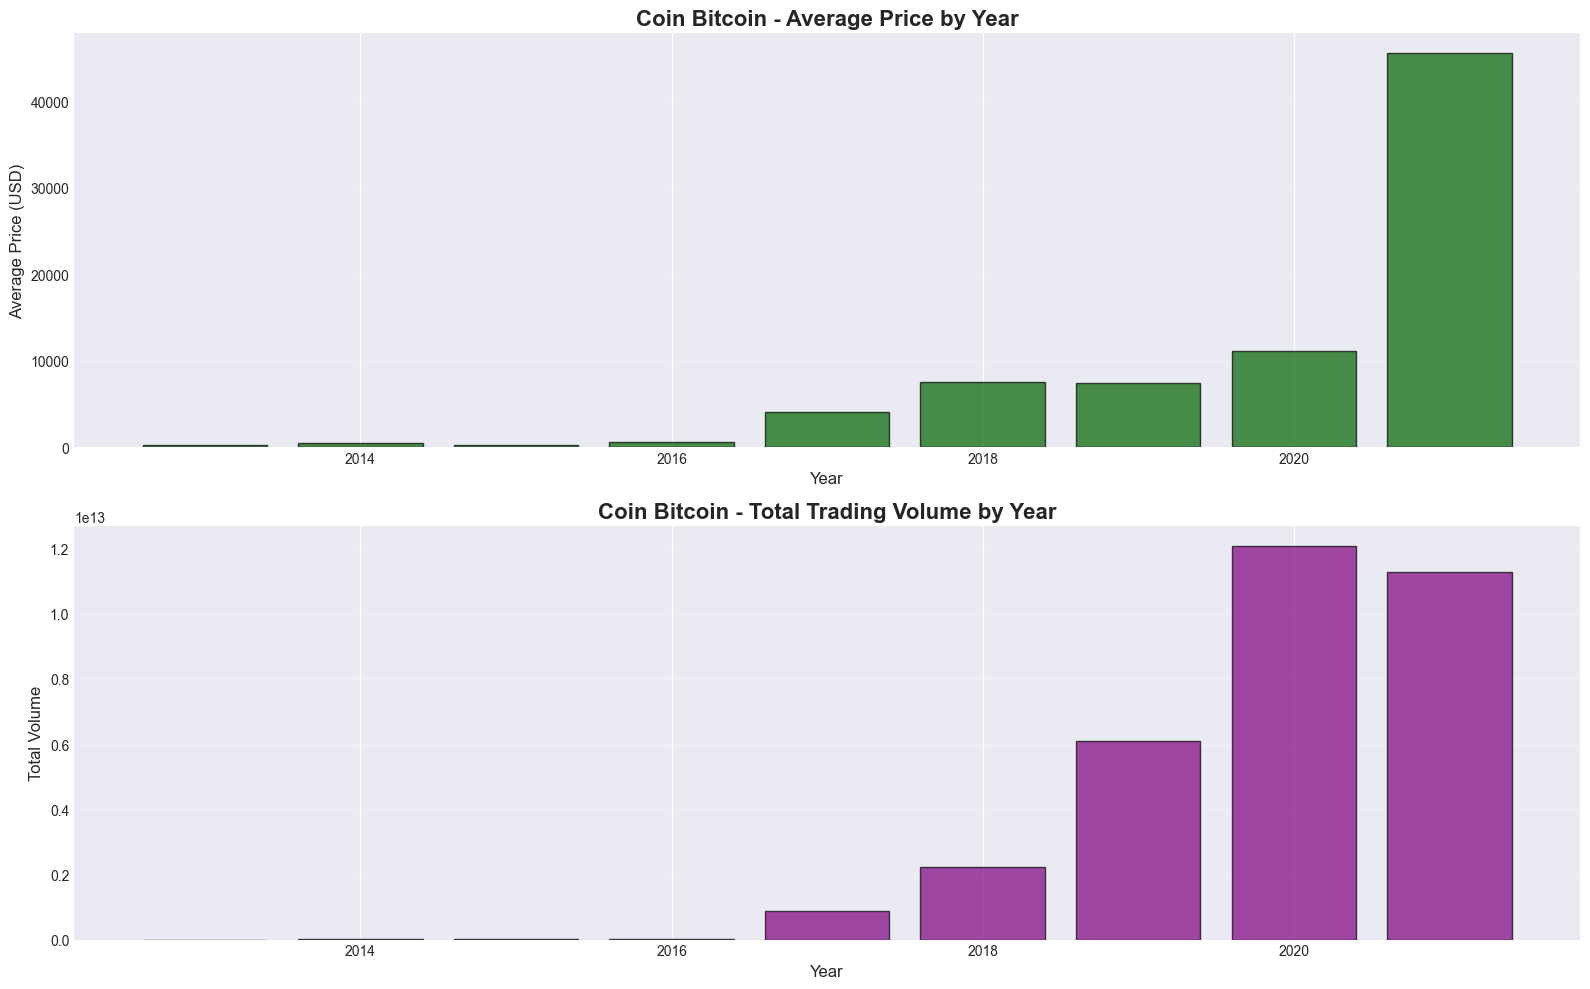

In [125]:
# Visualize yearly trends
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

yearly_mean = btc_seasonal.groupby('Year')['Close'].mean()
yearly_volume = btc_seasonal.groupby('Year')['Volume'].sum()

# Average price by year
axes[0].bar(yearly_mean.index, yearly_mean.values, alpha=0.7, 
           color='darkgreen', edgecolor='black')
axes[0].set_title(f'{bitcoin_key} - Average Price by Year', 
                 fontsize=16, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Price (USD)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Total volume by year
axes[1].bar(yearly_volume.index, yearly_volume.values, alpha=0.7, 
           color='purple', edgecolor='black')
axes[1].set_title(f'{bitcoin_key} - Total Trading Volume by Year', 
                 fontsize=16, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Total Volume', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

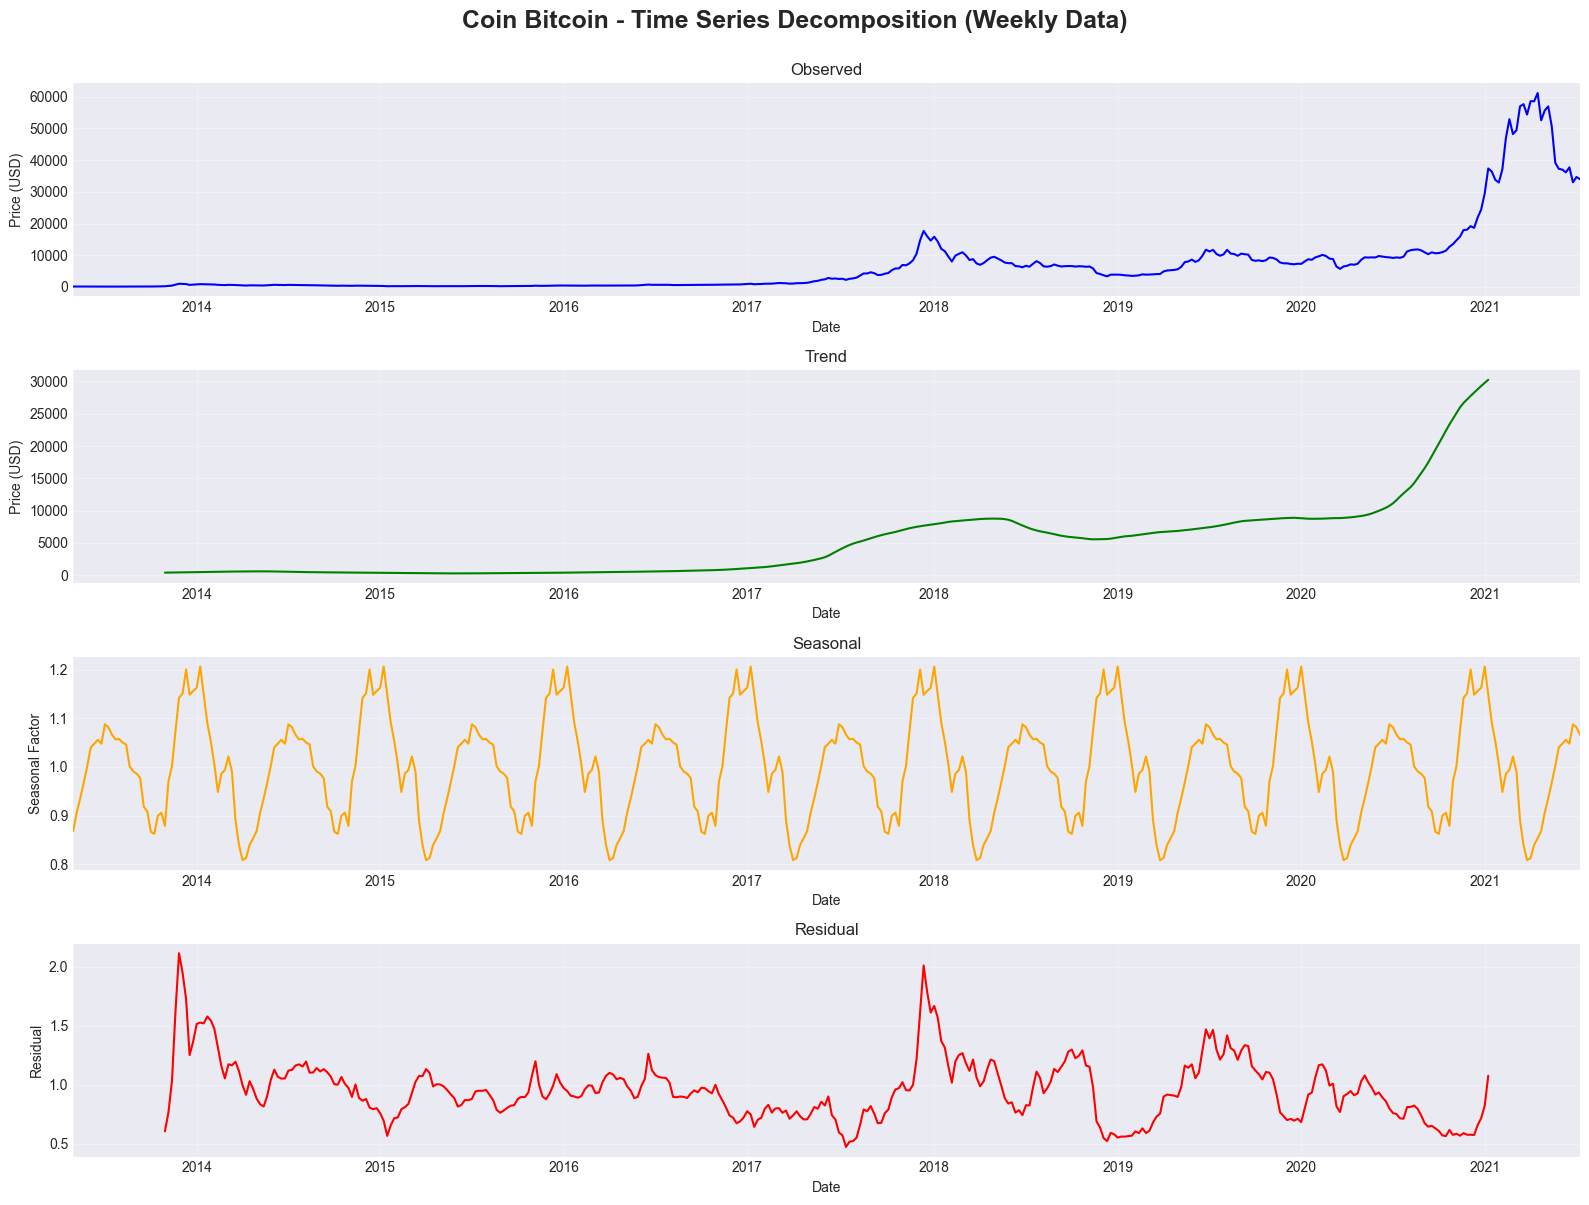

In [126]:
# Time series decomposition
# Resample to weekly frequency for better decomposition
btc_weekly = btc_seasonal['Close'].resample('W').mean()

# Perform seasonal decomposition
# Need at least 2 full seasonal cycles
if len(btc_weekly) >= 104:  # At least 2 years of weekly data
    decomposition = seasonal_decompose(btc_weekly, model='multiplicative', period=52)
    
    fig, axes = plt.subplots(4, 1, figsize=(16, 12))
    
    decomposition.observed.plot(ax=axes[0], title='Observed', color='blue')
    axes[0].set_ylabel('Price (USD)')
    axes[0].grid(True, alpha=0.3)
    
    decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
    axes[1].set_ylabel('Price (USD)')
    axes[1].grid(True, alpha=0.3)
    
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='orange')
    axes[2].set_ylabel('Seasonal Factor')
    axes[2].grid(True, alpha=0.3)
    
    decomposition.resid.plot(ax=axes[3], title='Residual', color='red')
    axes[3].set_ylabel('Residual')
    axes[3].grid(True, alpha=0.3)
    
    fig.suptitle(f'{bitcoin_key} - Time Series Decomposition (Weekly Data)', 
                fontsize=18, fontweight='bold', y=1.0)
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for seasonal decomposition (need at least 2 years)")

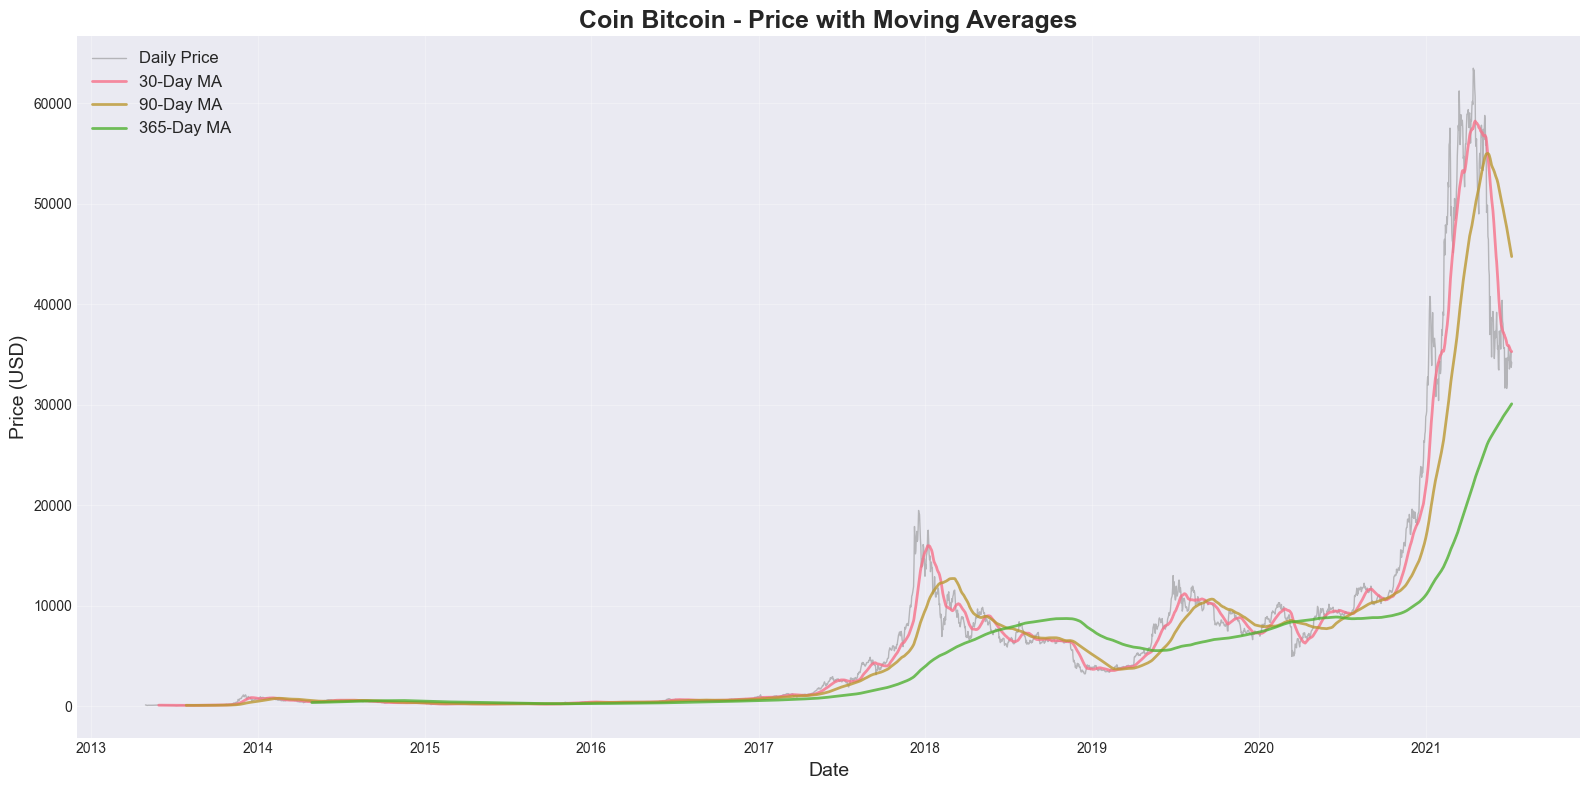

In [127]:
# Calculate and visualize moving averages
btc_seasonal['MA_30'] = btc_seasonal['Close'].rolling(window=30).mean()
btc_seasonal['MA_90'] = btc_seasonal['Close'].rolling(window=90).mean()
btc_seasonal['MA_365'] = btc_seasonal['Close'].rolling(window=365).mean()

plt.figure(figsize=(16, 8))
plt.plot(btc_seasonal.index, btc_seasonal['Close'], label='Daily Price', 
        linewidth=1, alpha=0.5, color='gray')
plt.plot(btc_seasonal.index, btc_seasonal['MA_30'], label='30-Day MA', 
        linewidth=2, alpha=0.8)
plt.plot(btc_seasonal.index, btc_seasonal['MA_90'], label='90-Day MA', 
        linewidth=2, alpha=0.8)
plt.plot(btc_seasonal.index, btc_seasonal['MA_365'], label='365-Day MA', 
        linewidth=2, alpha=0.8)

plt.title(f'{bitcoin_key} - Price with Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== Recent Month-over-Month Growth Rates ===

Year_Month
2020-08     3.155872
2020-09    -7.673510
2020-10    27.785298
2020-11    42.412325
2020-12    47.773176
2021-01    14.180669
2021-02    36.308760
2021-03    30.531110
2021-04    -1.983501
2021-05   -35.354564
2021-06    -6.139409
2021-07    -2.299157
Freq: M, Name: Close, dtype: float64


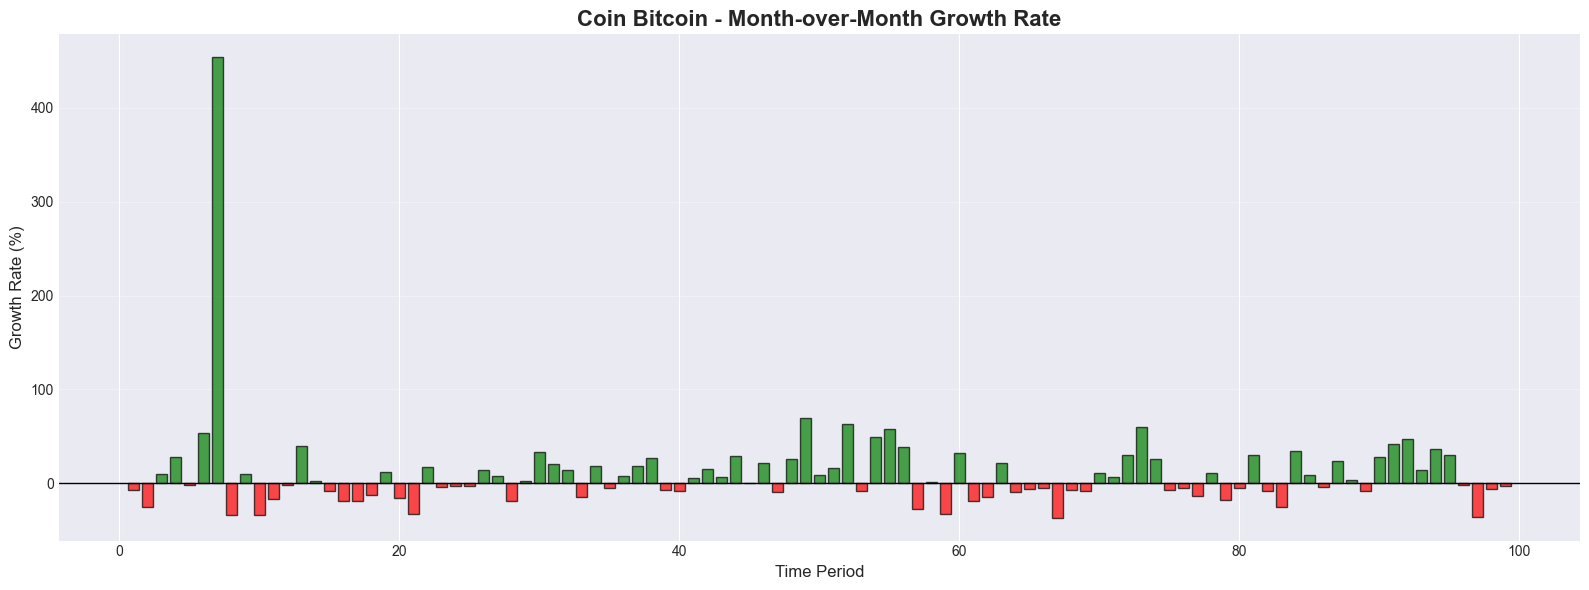

In [128]:
# Analyze month-over-month growth rates
btc_seasonal['Year_Month'] = btc_seasonal.index.to_period('M')
monthly_close = btc_seasonal.groupby('Year_Month')['Close'].last()
monthly_growth = monthly_close.pct_change() * 100

print("\n=== Recent Month-over-Month Growth Rates ===\n")
print(monthly_growth.tail(12))

# Visualize monthly growth rates
plt.figure(figsize=(16, 6))
colors = ['green' if x > 0 else 'red' for x in monthly_growth]
plt.bar(range(len(monthly_growth)), monthly_growth.values, alpha=0.7, color=colors, 
       edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.title(f'{bitcoin_key} - Month-over-Month Growth Rate', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

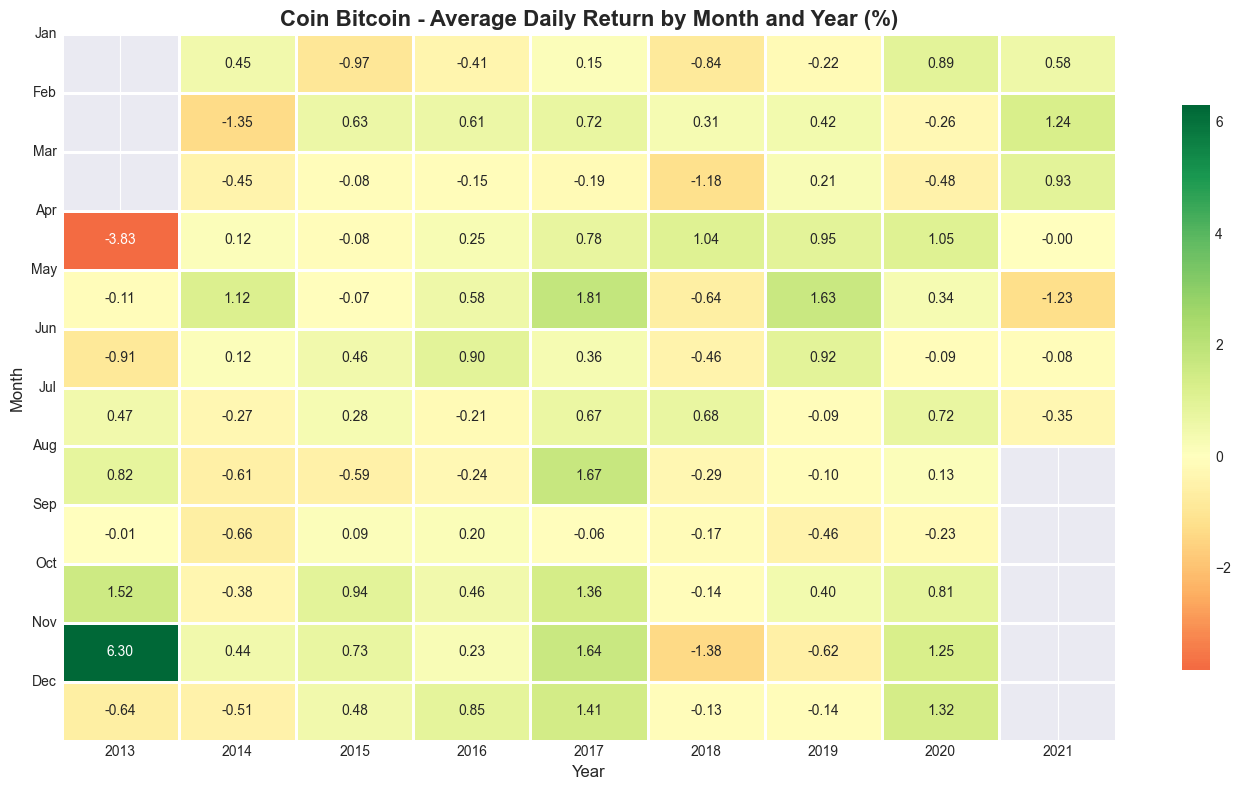

In [129]:
# Create a heatmap of average returns by month and year
pivot_data = btc_seasonal.pivot_table(values='Daily_Return', 
                                      index='Month', 
                                      columns='Year', 
                                      aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
           linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(f'{bitcoin_key} - Average Daily Return by Month and Year (%)', 
         fontsize=16, fontweight='bold')
plt.ylabel('Month', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

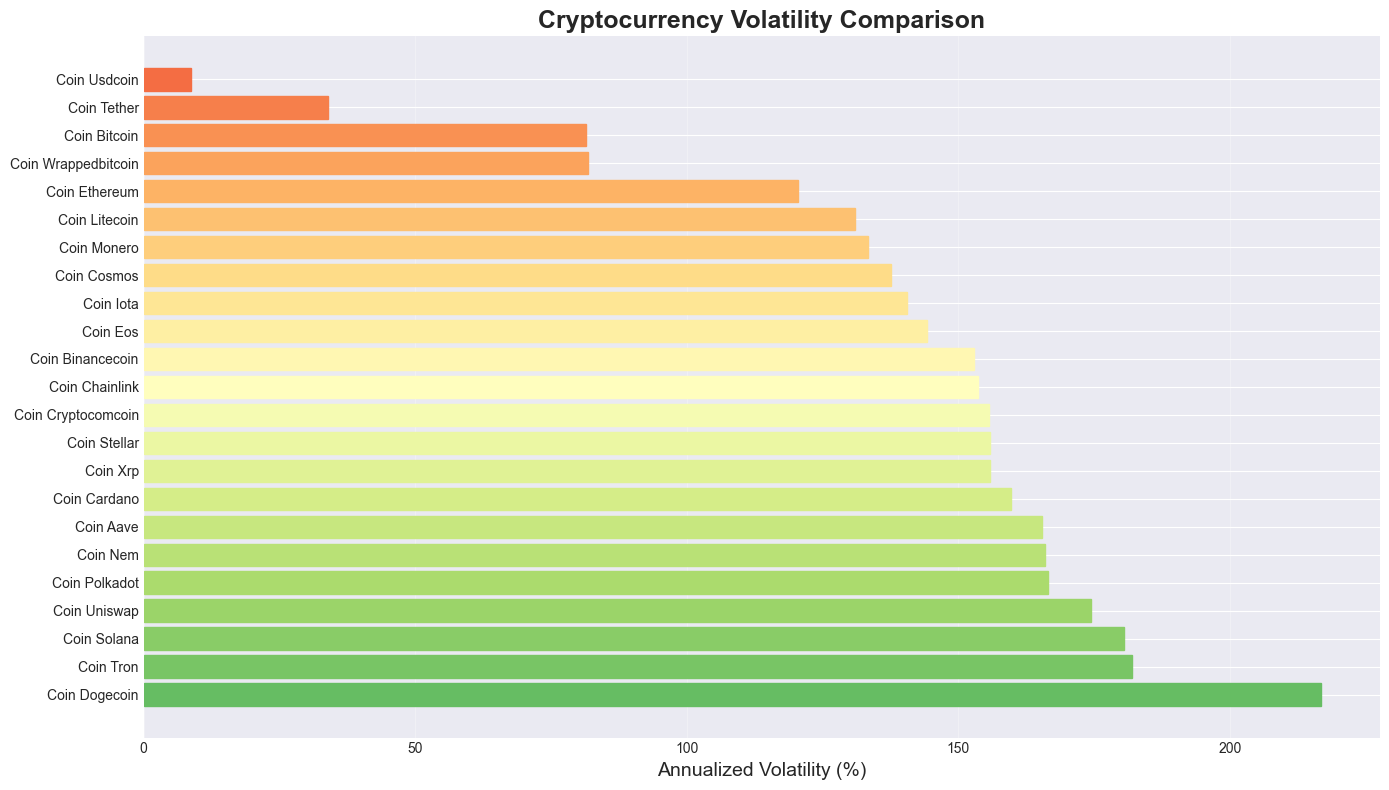

In [130]:
# Visualize annualized volatility
plt.figure(figsize=(14, 8))
bars = plt.barh(volatility_df['Cryptocurrency'], volatility_df['Volatility (Annualized)'])

# Color code: high volatility (red), low volatility (green)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Annualized Volatility (%)', fontsize=14)
plt.title('Cryptocurrency Volatility Comparison', fontsize=18, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()